# Análise de energia gerada por painéis solares
![painesi_solares_rj](images/pngwing.com.png)

## Objetivo:
* O objetivo deste notebook é analisar os dados de um sistema fotovoltaico e as condições do ambiente, em busca de relações entre as variáveis, identificação de possíveis problemas e aprofundar o conhecimento de sistemas fotovoltaicos através dos dados disponíveis.

## Introdução
> O painel solar fotovoltaico é o responsável por transformar a energia solar em eletricidade, o painel solar é composto por células solares.
> Um módulo solar é composto por várias células fotovoltaicas, enquanto um painel solar é composto por vários módulos solares. O sistema fotovoltaico é composto por vários painéis solares (ou também chamados de fotovoltaicos).

### Descrevendo a função de cada parte do sistema:
* `Célula fotovoltaica`: é o dispositivo elétrico responsável por converter a energia da luz do sol diretamente em energia elétrica por meio do efeito fotovoltaico. Para isso, as células fotovoltaicas são produzidas a partir de materiais semicondutores, os quais podem ser de diferentes tipos.
* `Módulo fotovoltaico`:  O módulo fotovoltaico é composto por 36 a 72 células solares produzidas normalmente por silício e é utilizado para a captação da luz do sol.
* `Painel fotovoltaico`: Agrupamento de módulos.

### Efeito fotovoltaico:
* O processo do efeito fotovoltaico tem início no momento em que os raios de Sol atingem o material condutor. Nesse segundo, um fóton (partícula de luz) atinge um elétron da última órbita do átomo do material em questão. Esse elétron, então, se torna um elétron de valência, e recebe a energia. 
Com isso, o elétron de valência deixa a órbita do núcleo, pois supera a sua força de atração. Essa movimentação de deixar a órbita permite que o elétron viaje através do material. É isso que o torna um material condutor, e é essa “viagem” que gera uma corrente de energia elétrica.
A importância do efeito fotovoltaico para o sistema, então, fica clara. Sem esse fenômeno, a produção de eletricidade através da energia solar simplesmente não poderia existir.
- Fonte: https://cogera.com.br/

### Tipos de sistemas fotovoltaicos:

#### Sistema on-grid:
* É conectado à rede elétrica de distribuição de energia. Nesta forma de instalação, o valor da conta de energia é reduzido, pois a energia excedente é alocada na rede pública e se converte em créditos compensados no valor da conta.

![on-grid](images/37f372_5c16a05a3ff2476ca73641ce16d2cd99_mv2.webp)

#### Sistema off-grid:
* Não é conectado à rede elétrica de distribuição e o armazenando da energia solar é alocado em baterias. A energia armazenada nas baterias é distribuída de forma direta para os equipamentos domésticos e eletrônicos. Este modo é muito utilizado em locais que não são aten­didos pela rede de energia.

![on-grid](images/37f372_8c278635265e45c9914d63b9b21b23b5_mv2.webp)

#### Sistema Híbrido:
* Tem sua operação de modo simultâneo, entre on-grid e off-grid, fazendo com que ocorra o trabalho conectado à rede enquanto o banco de baterias está carregando, e vice-versa.

## Dataset:

* O dataset foi encontrado em: kaggle kernels output paule404/eda-condition-monitoring-solar-power-plant -p /path/to/dest
> O dataset desse estudo é composto por 4 arquivos, sendo:
1. Dados referentes ao sistema fotovoltaico 1.
2. Dados referentes as condições ambientais do sistema 1.
3. Dados referentes ao sistema fotovoltaico 2.
4. Dados referentes as condições ambientais do sistema 2.


## Dicionários dos dados:

### Dados referentes ao sistema:

* DATE_TIME: Dia, mes, ano e hora.
* PLANT_ID: Valor constante, referente ao ID do sistema em análise.
* SOURCE_KEY: A chave de origem do inversor.
* DC_POWER: Quantidade de corrente contínua gerada pelo módulo.
* AC_POWER: Quantidade de corrente alternada gerada após passar pelo inversor.
* DAILY_YIELD: Rendimento diário
* TOTAL_YIELD: Rendimento total

### Dados referentes ao ambiente:

* DATE_TIME: Dia, mes, ano e hora.
* PLANT_ID: Valor constante, referente ao ID do sistema em análise.
* SOURCE_KEY: A chave de origem do inversor.
* AMBIENT_TEMPERATURE: Temperatura ambiente no local onde o sistema está instalado.
* MODULE_TEMPERATURE: Temperatura lida pelo módulo fotovoltaico.
* IRRADIATION: Quantidade de irradiação de energia no intervalo de 15 minutos.

## Iniciando análise exploratória:

In [448]:
# Importando as bibliotecas necessárias inicialmente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#plotagem dos gráficos após a celula
%matplotlib inline
sns.set_style('whitegrid')

In [449]:
# importando os dados necessários, inicialmente, só irei importar os dados referentes ao sistema 1

sist1_data = pd.read_csv('./data/Plant_1_Generation_Data.csv', parse_dates=['DATE_TIME']) #parse_dates, parametro de conversao de colunas para o formato datetime automatico
sist1_weather = pd.read_csv('./data/Plant_1_Weather_Sensor_Data.csv', parse_dates=['DATE_TIME'])

In [450]:
# visualizando parte dos dados
sist1_data.tail()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
68773 2020-06-17 23:45:00   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774 2020-06-17 23:45:00   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775 2020-06-17 23:45:00   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776 2020-06-17 23:45:00   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777 2020-06-17 23:45:00   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
68773     5967.000    7287002.0  
68774     5147.625    7028601.0  
68775     5819.000    7251204.0  
68776     5817.000    6583369.0  
68777     5910.000    7363272.0

In [451]:
sist1_weather.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0 2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1 2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2 2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3 2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4 2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0

> Inicialmente vemos que não há geração de qualquer corrente ou irradiação de energia, o que faz sentido se observamos a hora, entre 0h-1h da manhã.

In [452]:
# checando a dimensionalidade dos dados
sist1_data.shape, sist1_weather.shape

((68778, 7), (3182, 6))

In [453]:
# obetendo informações sobre os dados
sist1_data.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    4135001.0    429.000000     41.493750   2658.714286  7.146685e+06
75%    4135001.0   6366.964286    623.618750   6274.000000  7.268706e+06
max    4135001.0  14471.125000   1410.950000   9163.000000  7.846821e+06

In [454]:
sist1_weather.describe()

PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3182.0          3182.000000         3182.000000  3182.000000
mean   4135001.0            25.531606           31.091015     0.228313
std          0.0             3.354856           12.261222     0.300836
min    4135001.0            20.398505           18.140415     0.000000
25%    4135001.0            22.705182           21.090553     0.000000
50%    4135001.0            24.613814           24.618060     0.024653
75%    4135001.0            27.920532           41.307840     0.449588
max    4135001.0            35.252486           65.545714     1.221652

In [455]:
# checando quantos inversores temos no dataset
len(sist1_data.SOURCE_KEY.unique())

22

In [456]:
sist1_data.SOURCE_KEY.value_counts()

bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
7JYdWkrLSPkdwr4    3133
VHMLBKoKgIrUVDU    3133
ZnxXDlPa8U1GXgE    3130
ih0vzX44oOqAx2f    3130
z9Y9gH1T5YWrNuG    3126
wCURE6d3bPkepu2    3126
uHbuxQJl8lW7ozc    3125
pkci93gMrogZuBj    3125
iCRJl6heRkivqQ3    3125
rGa61gmuvPhdLxV    3124
sjndEbLyjtCKgGv    3124
McdE0feGgRqW7Ca    3124
zVJPv84UY57bAof    3124
ZoEaEvLYb1n2sOq    3123
1IF53ai7Xc0U56Y    3119
adLQvlD726eNBSB    3119
zBIq5rxdHJRwDNY    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: SOURCE_KEY, dtype: int64

> Pelo describe é possível observar grande diferença a cerca da média e mediana dos valores de corrente e rendimento. O que pode ser resultado de outliers.
> Também é possível observar que não é possível extrair nada de PLANT_ID, que como já dito no dicionários de dados é um valor constante. Também não conseguimos extrair muita informação a cerca de source_key, pois nesse dataset não temos dados a cerca da dimensão do módulo, posição e tipo, que seriam variáveis a serem consideradas no rendimento de cada módulo. De qualquer forma, irei manter para avaliar mais a frente o rendimento de cada módulo, se há diferenças consideráveis ou não.
* Devido ao citado anteriormente, as colunas PLANT_ID serão removidas da análise.

In [457]:
# o parametro inplace é usado para evitar que o dataframe seja instanciado novamente
sist1_data.drop(['PLANT_ID'], axis=1, inplace=True)
sist1_weather.drop(['PLANT_ID'], axis=1, inplace=True)


In [458]:
sist1_data.info(), print('\n------------------\n'),sist1_weather.info() # checando os tipos das features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   SOURCE_KEY   68778 non-null  object        
 2   DC_POWER     68778 non-null  float64       
 3   AC_POWER     68778 non-null  float64       
 4   DAILY_YIELD  68778 non-null  float64       
 5   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 3.1+ MB

------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   SOURCE_KEY           3182 non-null   object        
 2   AMBIENT_TEMPERATURE  3182 non-null   float64       
 3   MODULE_TEMPE

(None, None, None)

In [459]:
# checando se há missing values
sist1_weather.isna().sum(), sist1_data.isna().sum()

(DATE_TIME              0
 SOURCE_KEY             0
 AMBIENT_TEMPERATURE    0
 MODULE_TEMPERATURE     0
 IRRADIATION            0
 dtype: int64,
 DATE_TIME      0
 SOURCE_KEY     0
 DC_POWER       0
 AC_POWER       0
 DAILY_YIELD    0
 TOTAL_YIELD    0
 dtype: int64)

In [460]:
# ordenando dataframe pela data e reordenando o index
sist1_data.sort_values(by='DATE_TIME', inplace=True)
sist1_data.reset_index(drop=True,inplace=True)

sist1_weather.sort_values(by='DATE_TIME', inplace=True)
sist1_weather.reset_index(drop=True,inplace=True)

In [461]:
sist1_data.tail()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
68773 2020-12-06 23:45:00  3PZuoBAID5Wc2HD       0.0       0.0       5900.0   
68774 2020-12-06 23:45:00  1IF53ai7Xc0U56Y       0.0       0.0       5903.0   
68775 2020-12-06 23:45:00  1BY6WEcLGh8j5v7       0.0       0.0       5441.0   
68776 2020-12-06 23:45:00  bvBOhCH3iADSZry       0.0       0.0       2686.0   
68777 2020-12-06 23:45:00  WRmjgnKYAwPKWDb       0.0       0.0       5794.0   

       TOTAL_YIELD  
68773    7202086.0  
68774    6398227.0  
68775    6455679.0  
68776    6509779.0  
68777    7238780.0

In [462]:
sist1_weather.head()

DATE_TIME       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0 2020-05-15 00:00:00  HmiyD2TTLFNqkNe            25.184316   
1 2020-05-15 00:15:00  HmiyD2TTLFNqkNe            25.084589   
2 2020-05-15 00:30:00  HmiyD2TTLFNqkNe            24.935753   
3 2020-05-15 00:45:00  HmiyD2TTLFNqkNe            24.846130   
4 2020-05-15 01:00:00  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0

In [463]:
# mergeando os dois dataframes, para facilitar a manipulação e análise conjunta dos dados! Iremos remover o SOURCE_KEY pois há apenas 1 sensor para todo sistema. Logo, os valores de source_keys são iguais.
df1 = pd.merge(sist1_data, sist1_weather.drop(['SOURCE_KEY'], axis=1), on='DATE_TIME')
df1.sort_values(by='DATE_TIME', inplace=True)
df1.reset_index(drop=True,inplace=True)
df1.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15  1BY6WEcLGh8j5v7       0.0       0.0          0.0    6259559.0   
1 2020-05-15  adLQvlD726eNBSB       0.0       0.0          0.0    6271355.0   
2 2020-05-15  1IF53ai7Xc0U56Y       0.0       0.0          0.0    6183645.0   
3 2020-05-15  3PZuoBAID5Wc2HD       0.0       0.0          0.0    6987759.0   
4 2020-05-15  7JYdWkrLSPkdwr4       0.0       0.0          0.0    7602960.0   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0            25.184316           22.857507          0.0  
1            25.184316           22.857507          0.0  
2            25.184316           22.857507          0.0  
3            25.184316           22.857507          0.0  
4            25.184316           22.857507          0.0

In [464]:
# criando duas novas colunas, data e tempo (separadas) pois isso facilita a análise da hora e do dia de formas separadas
df1["DATA"] = pd.to_datetime(df1["DATE_TIME"]).dt.date # data
df1["TEMPO"] = pd.to_datetime(df1["DATE_TIME"]).dt.time # horário preciso, com horas, minutos e segundos.

df1['HORAS'] = pd.to_datetime(df1['TEMPO'],format='%H:%M:%S').dt.hour # hora em inteiro, para facilitar plots e análise de machine learning caso necessário
df1['MINUTOS'] = pd.to_datetime(df1['TEMPO'],format='%H:%M:%S').dt.minute # minutos referentes ao horário inteiro

# add date as string column
df1["DATE_STR"] = df1["DATA"].astype(str) # data categórica


In [465]:
df1.dtypes

DATE_TIME              datetime64[ns]
SOURCE_KEY                     object
DC_POWER                      float64
AC_POWER                      float64
DAILY_YIELD                   float64
TOTAL_YIELD                   float64
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
DATA                           object
TEMPO                          object
HORAS                           int64
MINUTOS                         int64
DATE_STR                       object
dtype: object

(9.5, -0.5)

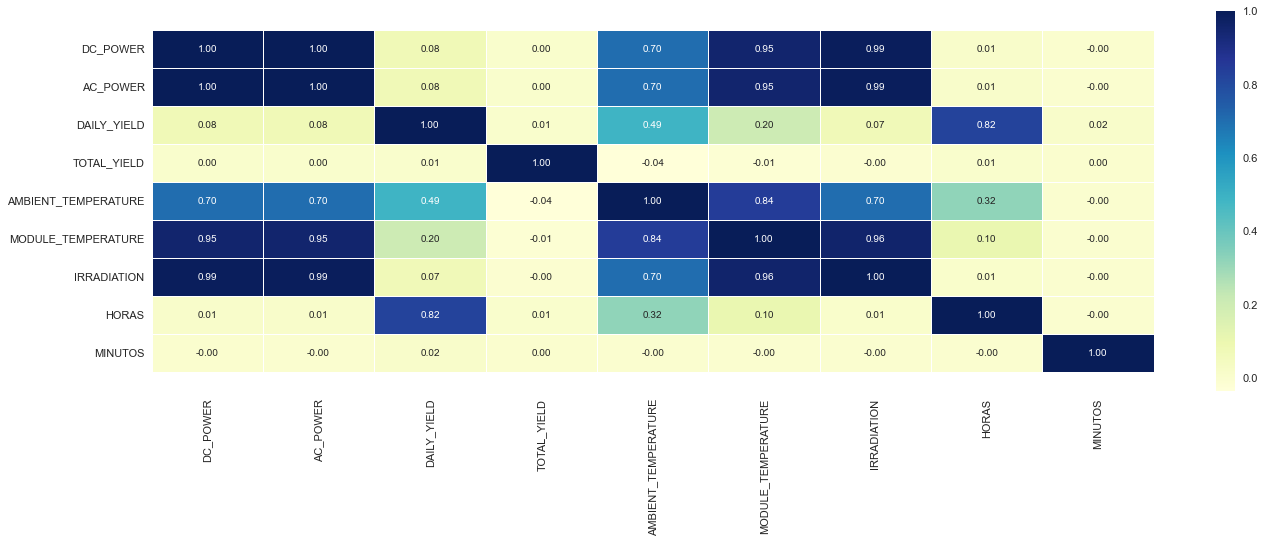

In [466]:
# criando e plotando uma matrix de correlacao para avaliar a relacao entre as features 
corr_matrix = df1.corr()
fig, ax = plt.subplots(figsize=(20, 7))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

> Pela matrix de correlação, ficou clara a relação de linearidade entre algumas váriáveis, como a temperatura do ambiente e a temperatura do módulo ( que devem ser próximas ). Assim como a relação perfeita entre AC e DC já que a corrente continua é transformada em corrente alternada pelo inversor.
> Uma relação que me surpreendeu foi a "pequena" relação entre o rendimento diário com a temperatura, mas por um lado também faz sentido, pois só foi levado em consideracao a temperatura "total", quando na verdade o dia é composto por 24hrs.

### Transformando números em gráficos

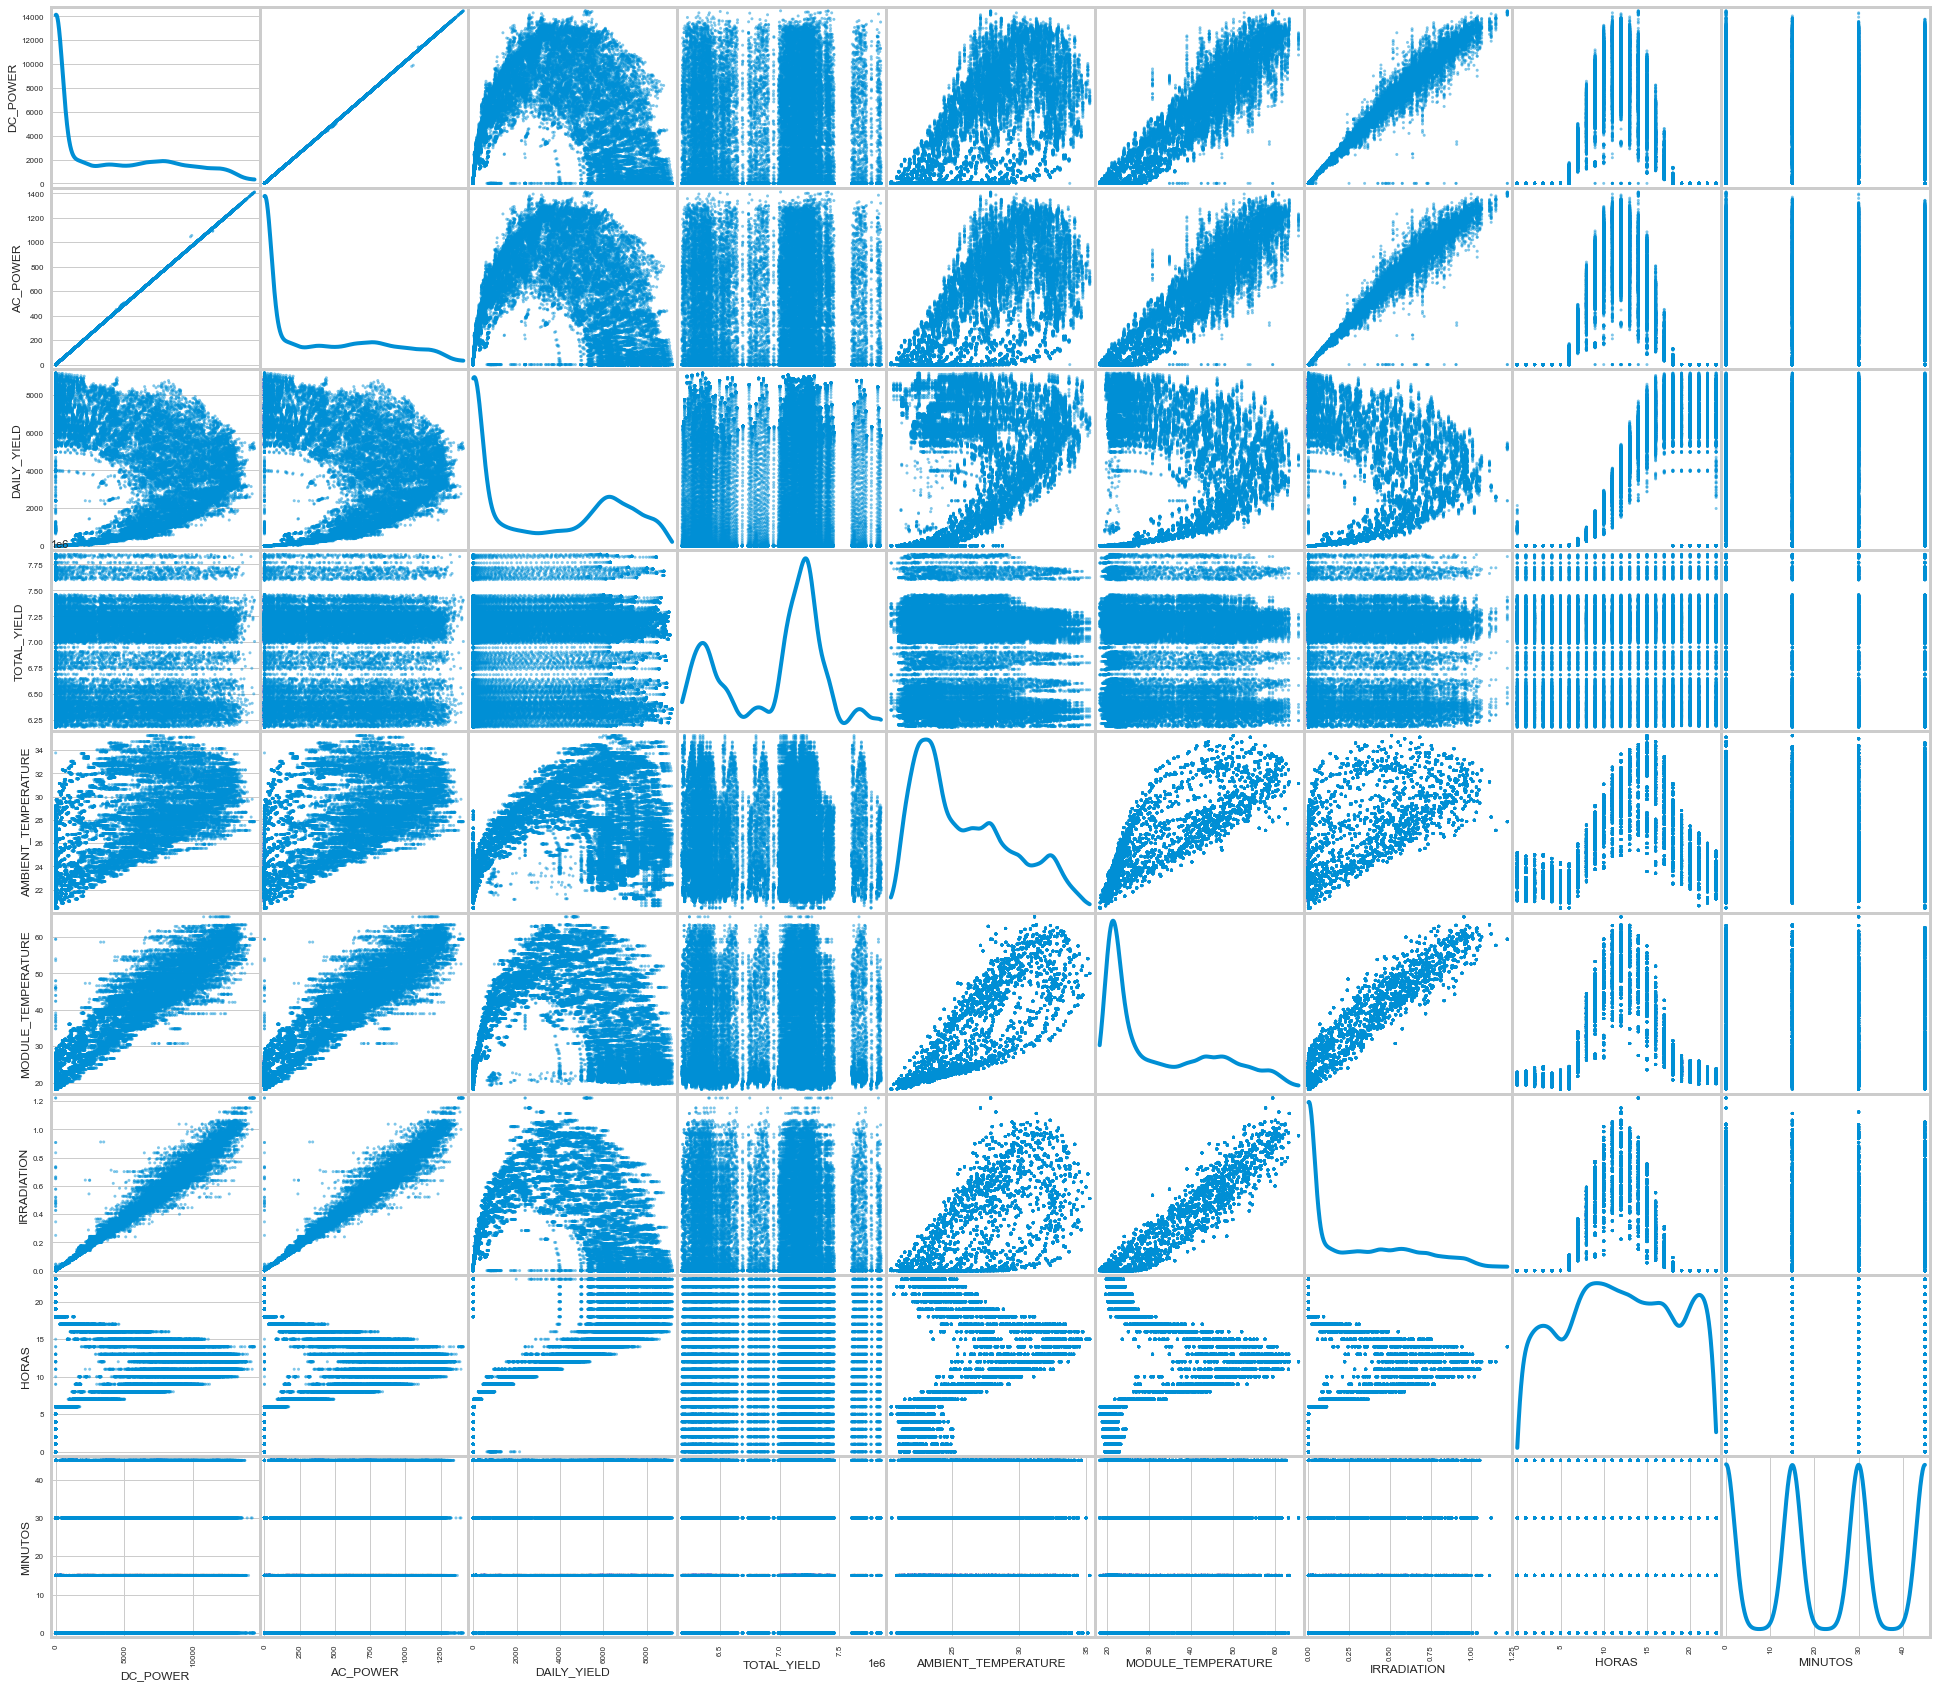

In [467]:
pd.plotting.scatter_matrix(df1, diagonal='kde', figsize=(30, 30));

In [468]:
df1.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15  1BY6WEcLGh8j5v7       0.0       0.0          0.0    6259559.0   
1 2020-05-15  adLQvlD726eNBSB       0.0       0.0          0.0    6271355.0   
2 2020-05-15  1IF53ai7Xc0U56Y       0.0       0.0          0.0    6183645.0   
3 2020-05-15  3PZuoBAID5Wc2HD       0.0       0.0          0.0    6987759.0   
4 2020-05-15  7JYdWkrLSPkdwr4       0.0       0.0          0.0    7602960.0   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATA     TEMPO  \
0            25.184316           22.857507          0.0  2020-05-15  00:00:00   
1            25.184316           22.857507          0.0  2020-05-15  00:00:00   
2            25.184316           22.857507          0.0  2020-05-15  00:00:00   
3            25.184316           22.857507          0.0  2020-05-15  00:00:00   
4            25.184316           22.857507          0.0  2020-05-15  00:00:00   

   HORAS  MINUTOS    DATE_STR  
0      0        0  2020-05-15  
1      0        0  2020-05-15  
2      0        0  2020-05-15  
3      0        0  2020-05-15  
4      0        0  2020-05-15

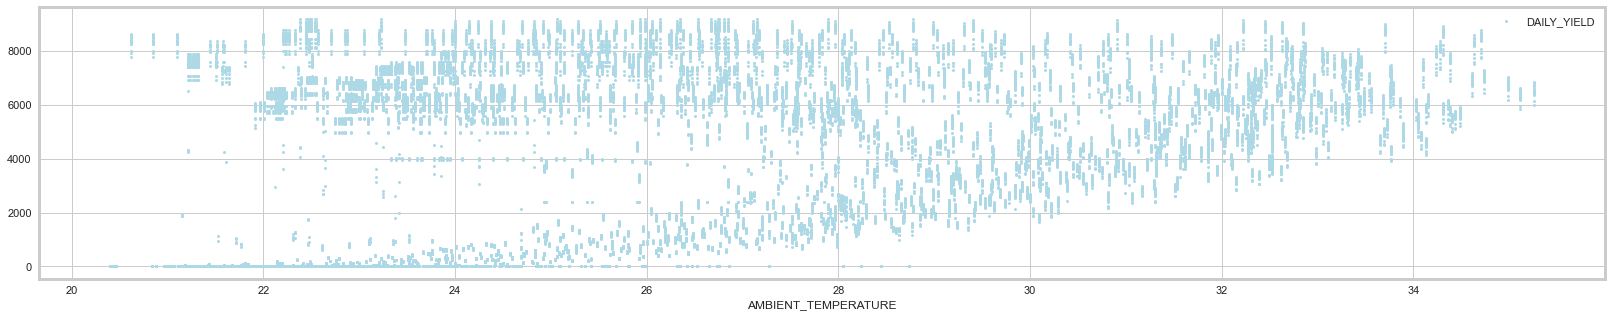

In [469]:
df1.plot(x='AMBIENT_TEMPERATURE', y='DAILY_YIELD', style='.', figsize = (25, 5), color='lightblue');

> Poderiamos modelar essa relação através de uma parábola como exemplificado a seguir.

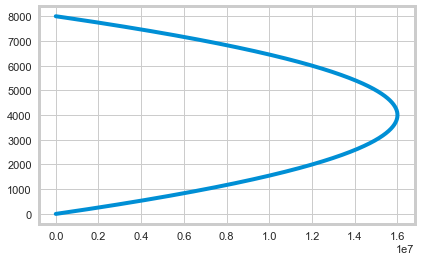

In [470]:
y = np.linspace(0, 8000, 8000)
x =-(y)**2 + 8000*y
plt.plot(x,y);

> Checando a hipótese anterior de que o rendimento diário se relacionaria melhor com a hora do dia


In [471]:
df1.dtypes

DATE_TIME              datetime64[ns]
SOURCE_KEY                     object
DC_POWER                      float64
AC_POWER                      float64
DAILY_YIELD                   float64
TOTAL_YIELD                   float64
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
DATA                           object
TEMPO                          object
HORAS                           int64
MINUTOS                         int64
DATE_STR                       object
dtype: object

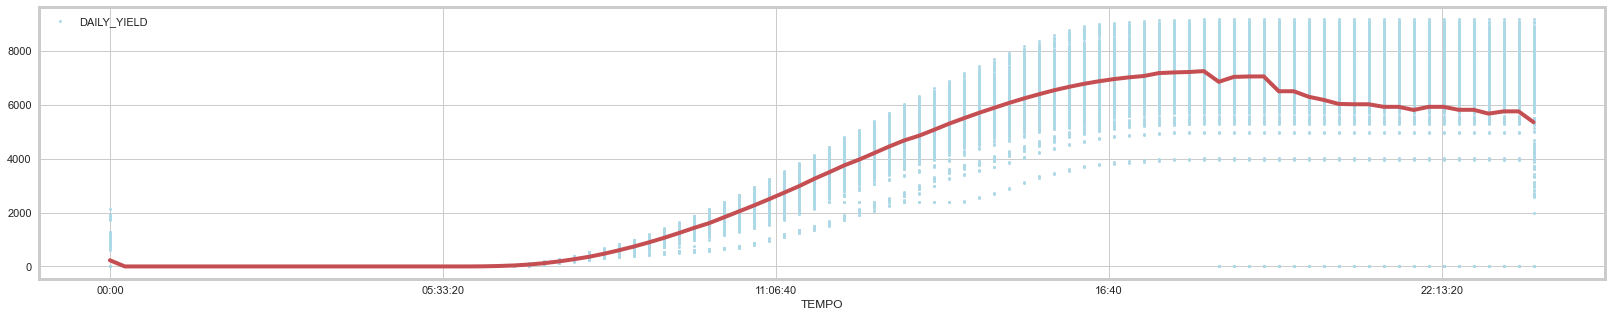

In [472]:
df1.plot(x= 'TEMPO', y='DAILY_YIELD', style='.', figsize = (25, 5), color='lightblue')
df1.groupby('TEMPO')['DAILY_YIELD'].agg('mean').plot(color='r');

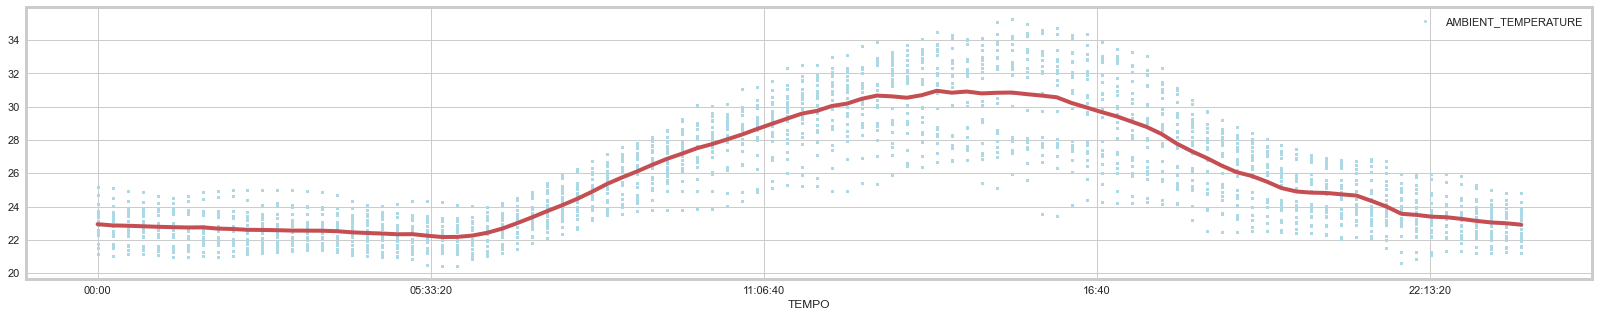

In [473]:
df1.plot(x= 'TEMPO', y='AMBIENT_TEMPERATURE', style='.', figsize = (25, 5), color='lightblue')
df1.groupby('TEMPO')['AMBIENT_TEMPERATURE'].agg('mean').plot(color='r');

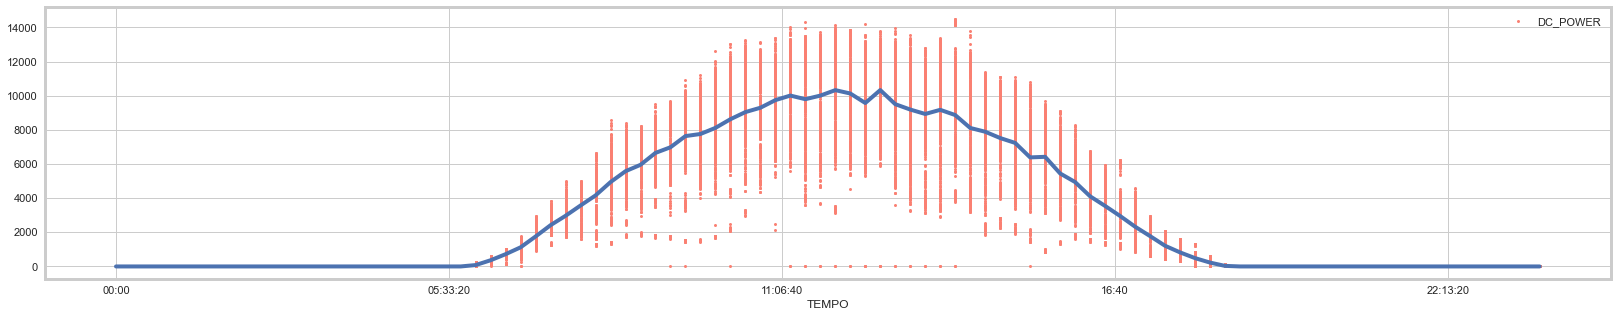

In [474]:
df1.plot(x= 'TEMPO', y='DC_POWER', style='.', figsize = (25, 5), color='salmon')
df1.groupby('TEMPO')['DC_POWER'].agg('mean').plot(color='b');

> Vemos que a produção de corrente direta atinge seu pico entre 11h e 13h.

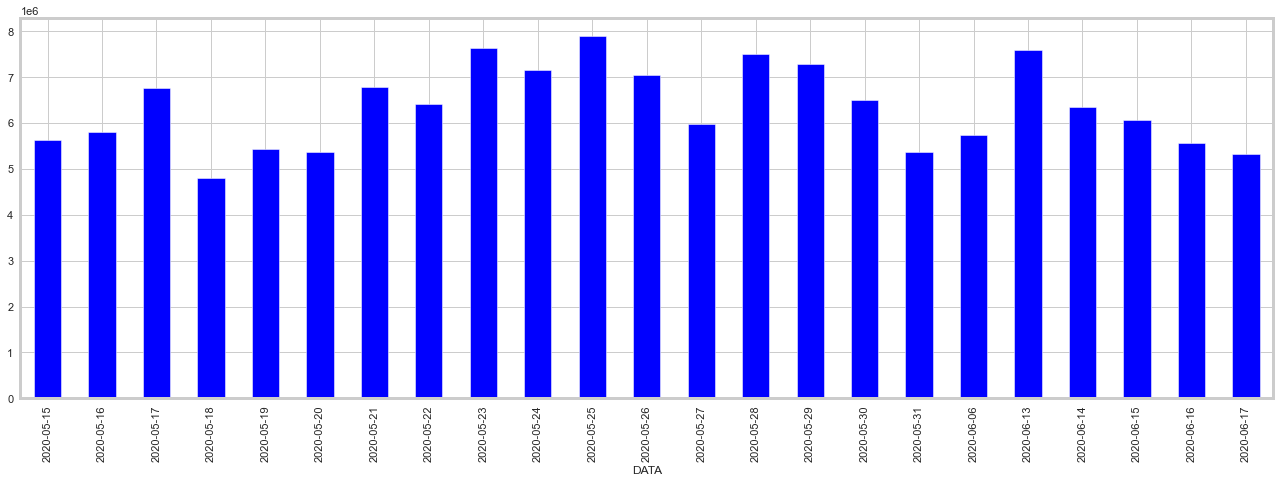

In [475]:
# df1.plot(x= 'data', y='DC_POWER', style='.', figsize = (25, 5), color='lightblue');
df1.groupby('DATA')['DC_POWER'].agg('sum').plot(kind='bar', color='blue', figsize=(20,7));

> No dia 25/05/2020 foi a maior produção de energia.

### Avaliando o dia 25/05/2020

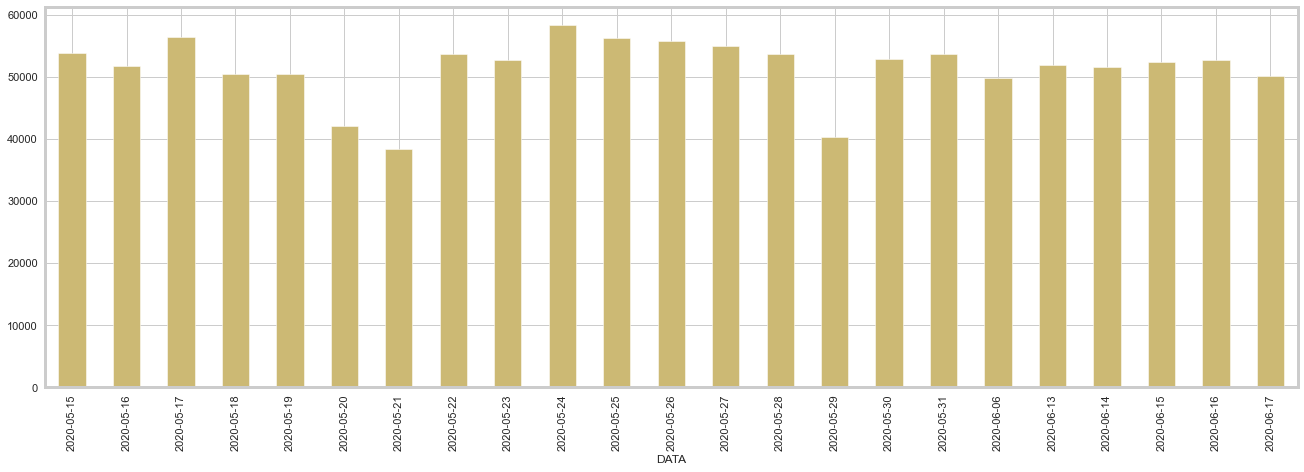

In [476]:
df1.groupby('DATA')['AMBIENT_TEMPERATURE'].agg('sum').plot(kind='bar', color='y', figsize=(20,7));

> O dia avaliado também teve a maior somátoria de temperatura.

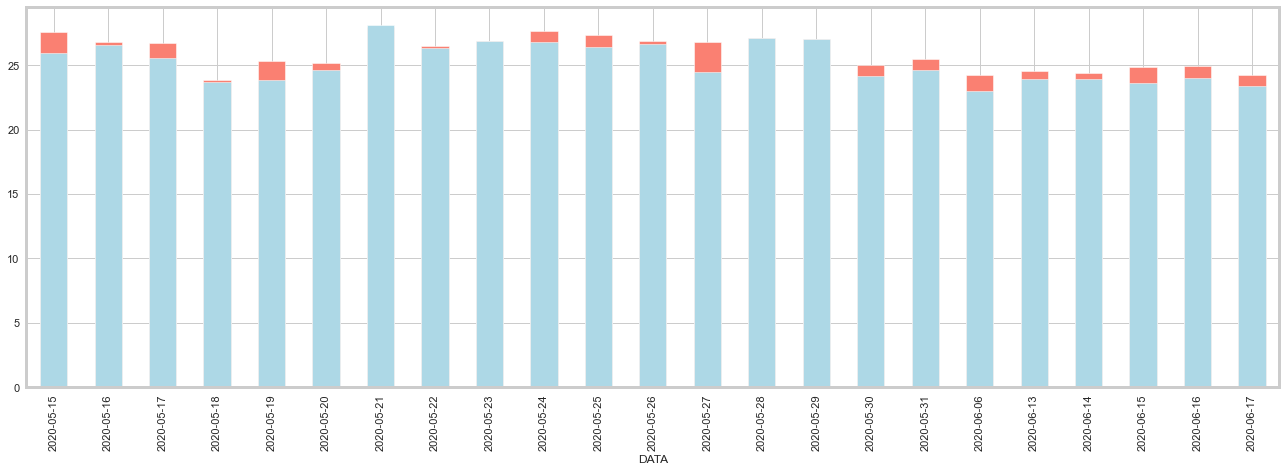

In [477]:
df1.groupby('DATA')['AMBIENT_TEMPERATURE'].agg('mean').plot(kind='bar', color='salmon', figsize=(20,7));
df1.groupby('DATA')['AMBIENT_TEMPERATURE'].agg('median').plot(kind='bar', color='lightblue', figsize=(20,7));

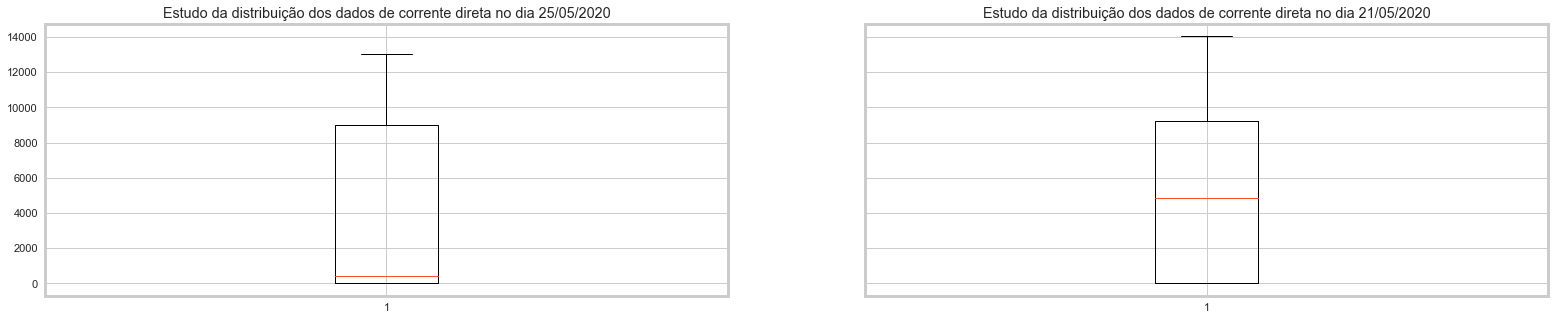

In [478]:
fig, (ax1,ax2)= plt.subplots(1,2 ,figsize=(24,5), sharey=True)

ax1.boxplot(x=df1.DC_POWER[df1.DATE_STR == '2020-05-25'])
ax1.set(title='Estudo da distribuição dos dados de corrente direta no dia 25/05/2020')

ax2.boxplot(x=df1.DC_POWER[df1.DATE_STR == '2020-05-21'])
ax2.set(title='Estudo da distribuição dos dados de corrente direta no dia 21/05/2020');


In [479]:
df1.AMBIENT_TEMPERATURE[df1.DATE_STR == '2020-05-25'].describe(), df1.AMBIENT_TEMPERATURE[df1.DATE_STR == '2020-05-23'].describe()

(count    2060.000000
 mean       27.317159
 std         4.110457
 min        22.384967
 25%        23.564793
 50%        26.387640
 75%        31.562183
 max        34.705670
 Name: AMBIENT_TEMPERATURE, dtype: float64,
 count    1958.000000
 mean       26.895118
 std         3.926106
 min        21.458610
 25%        22.405438
 50%        26.854494
 75%        30.452373
 max        33.424020
 Name: AMBIENT_TEMPERATURE, dtype: float64)

> Como visto, temos uma máxima e terceiro quartil maiores no dia 25/05 do que no dia 21/05 (dia com mediana de temperatura), sendo esses fatores responsáveis por alcançar um nivel de produção de energia maior.

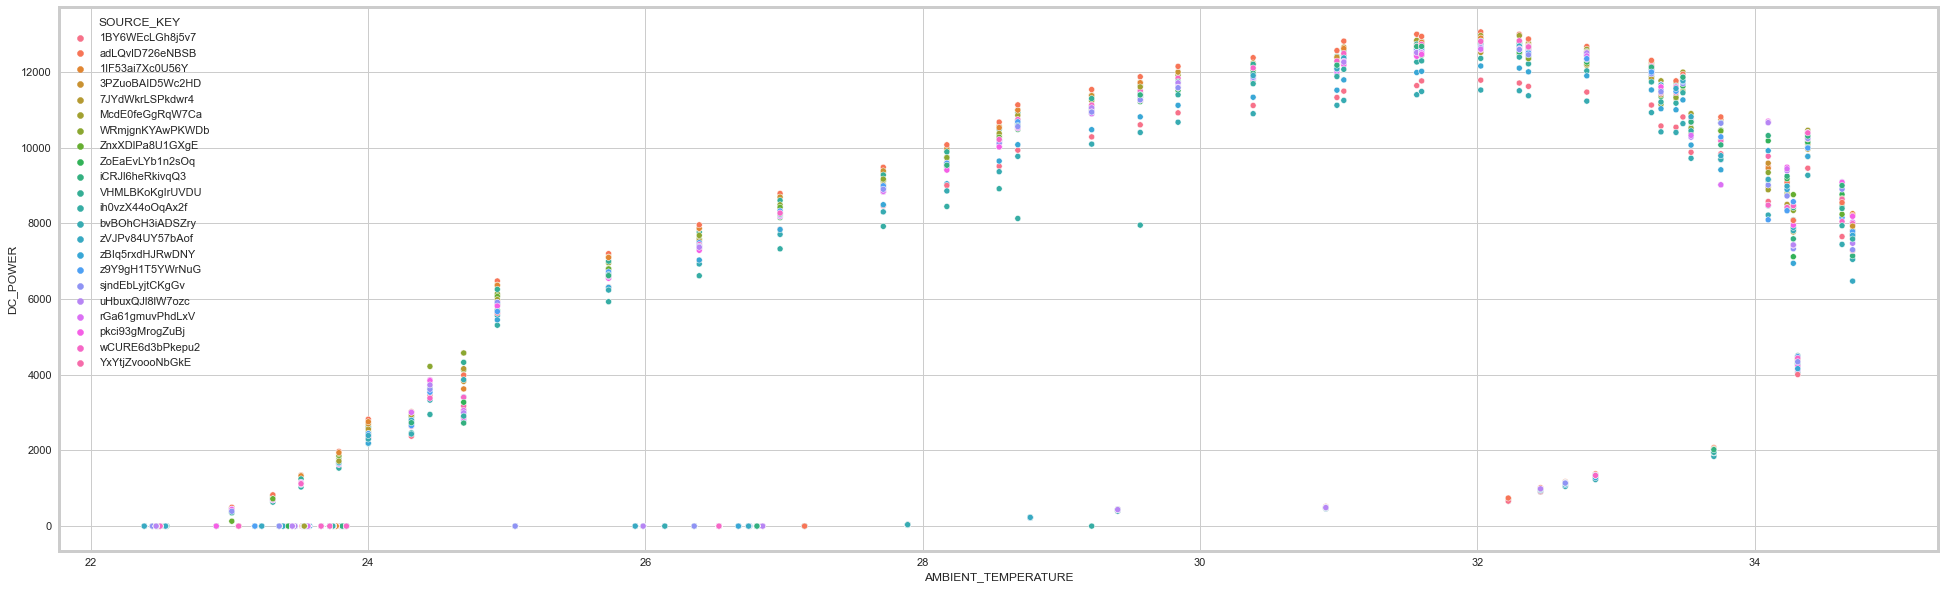

In [480]:
plt.figure(figsize=(30,10))
sns.scatterplot(df1.AMBIENT_TEMPERATURE[df1.DATE_STR == '2020-05-25'], 
            df1.DC_POWER[df1.DATE_STR == '2020-05-25'], 
            c="salmon",
            hue=df1.SOURCE_KEY);

plt.xlabel("AMBIENT_TEMPERATURE")
plt.ylabel("DC_POWER");

> Vemos pelo gráfico de dispersão que alguns módulos não registraram aumento na produção de energia, ou em alguns casos, chegaram a 0. Podem ser anomalias, ou seja, condições inesperadas no qual o inversor não foi capaz de converter a energia.

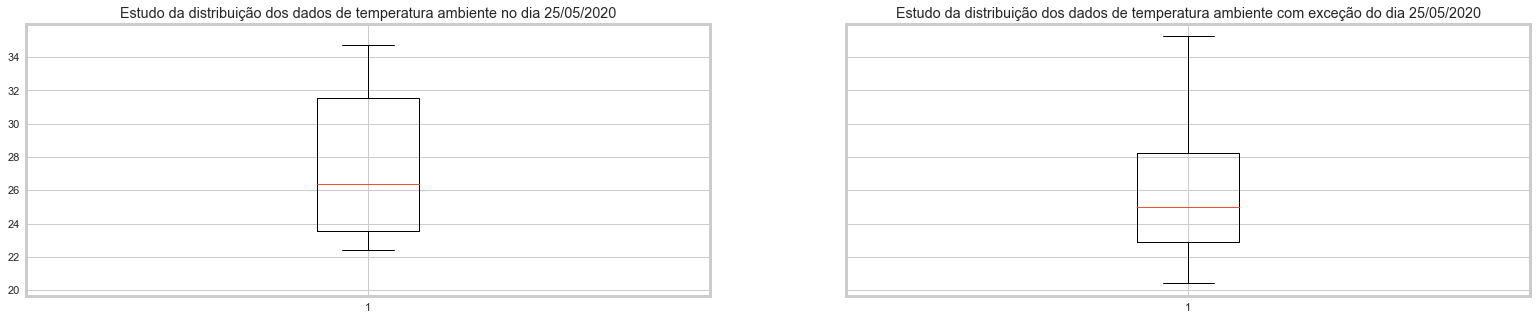

In [481]:
fig, (ax1,ax2)= plt.subplots(1,2 ,figsize=(24,5), sharey=True)

ax1.boxplot(x=df1.AMBIENT_TEMPERATURE[df1.DATE_STR == '2020-05-25'])
ax1.set(title='Estudo da distribuição dos dados de temperatura ambiente no dia 25/05/2020')

ax2.boxplot(x=df1.AMBIENT_TEMPERATURE[df1.DATE_STR != '2020-05-25'])
ax2.set(title='Estudo da distribuição dos dados de temperatura ambiente com exceção do dia 25/05/2020');


> Como podemos ver, o primeiro, segundo e terceiro quartil apresentam valores de temperatura maiores no dia avaliado. A média também é maior do que a dos dias restantes analisados em conjunto. O desvio também é menor. 'Perdendo' somente na temperatura máxima alcançada. O próximo passo da análise é avaliar o quanto o sensor do sistema fotovoltaico leu de temperatura.

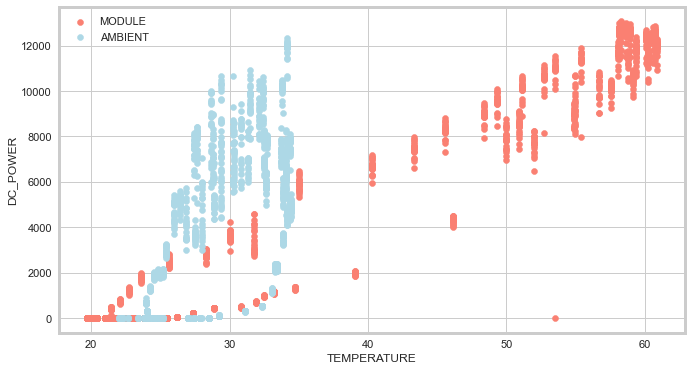

In [482]:
plt.figure(figsize=(10,6))
plt.scatter(df1.MODULE_TEMPERATURE[df1.DATE_STR == '2020-05-25'], 
            df1.DC_POWER[df1.DATE_STR == '2020-05-25'], 
            c="salmon")

plt.scatter(df1.AMBIENT_TEMPERATURE[df1.DATE_STR == '2020-05-15'], 
            df1.DC_POWER[df1.DATE_STR == '2020-05-15'], 
            c="lightblue") # define it as a scatter figure

plt.legend(["MODULE", "AMBIENT"])
plt.xlabel("TEMPERATURE")
plt.ylabel("DC_POWER");

> É normal o módulo ler quase o dobro da temperatura real?

In [483]:
df1.MODULE_TEMPERATURE.describe()

count    45680.000000
mean        31.877975
std         12.638448
min         18.140415
25%         21.406390
50%         25.379072
75%         42.757119
max         65.545714
Name: MODULE_TEMPERATURE, dtype: float64

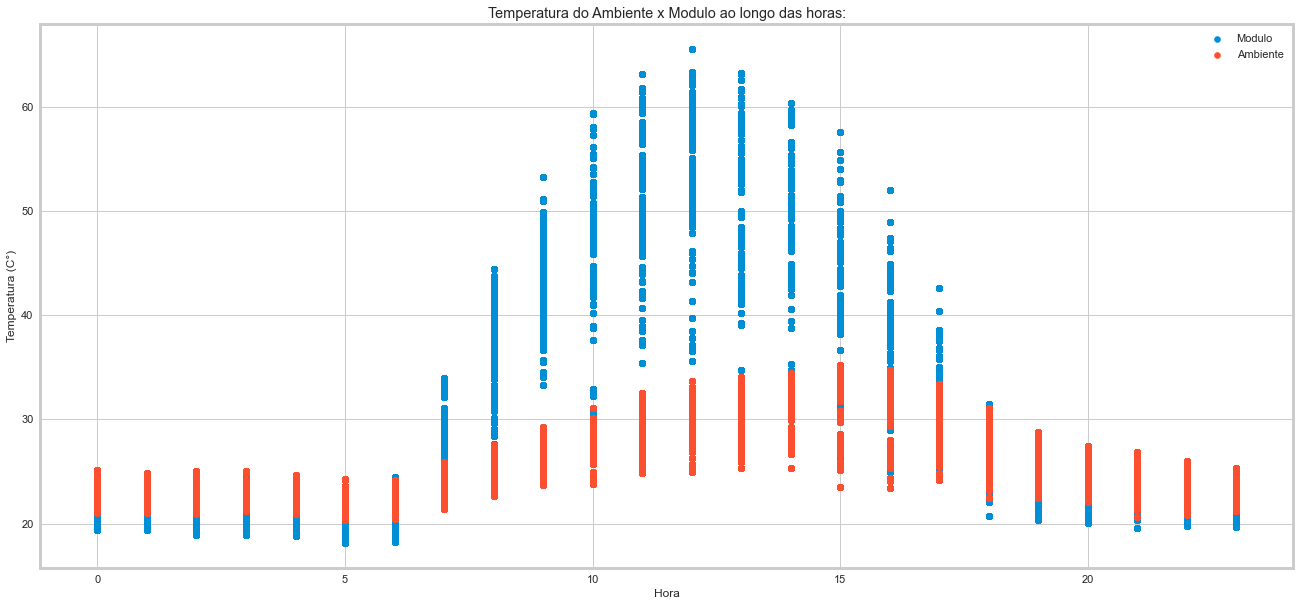

In [484]:
plt.subplots(figsize=(20,10))
plt.scatter(df1.HORAS, df1.MODULE_TEMPERATURE, label="Modulo")
plt.scatter(df1.HORAS, df1.AMBIENT_TEMPERATURE, label="Ambiente")
plt.title("Temperatura do Ambiente x Modulo ao longo das horas:")
plt.legend()
plt.xlabel("Hora")
plt.ylabel("Temperatura (C°)");

> Sim, o sensor lê uma temperatura maior que a real e também é interessante observar que durante os períodos mais frios, como noite e manhã, o módulo também está mais "frio" que a temperatura ambiente. Assim como há uma queda mais acentuada na temperatura do módulo quando há diminuição da temperatura, a resposta é mais rápida, tanto na alta quanto na queda.
* Segundo a fonte: https://energes.com.br/guia-completo-modulos-fotovoltaicos/
    * " Os parâmetros elétricos do módulo solar fotovoltaico são apresentados sob Condições Padrão (STC – Standard Test Conditions), onde a temperatura da célula é de 25ºC e irradiância de 1000 W/m².

    * Mas sabemos que isso essas condições não são usuais na realidade.

    * Por este motivo, encontramos também nos datasheets a Condição de Temperatura Nominal de Funcionamento (NOCT – Nominal Operating Cell Temperature), onde a temperatura ambiente é de 20°C, irradiância de 800 W/m2, velocidade do vento = 1m/s.

    * `Vale lembrar que a temperatura da célula pode variar de 20 a 40°C a mais do que a temperatura ambiente.`

### Irradiação

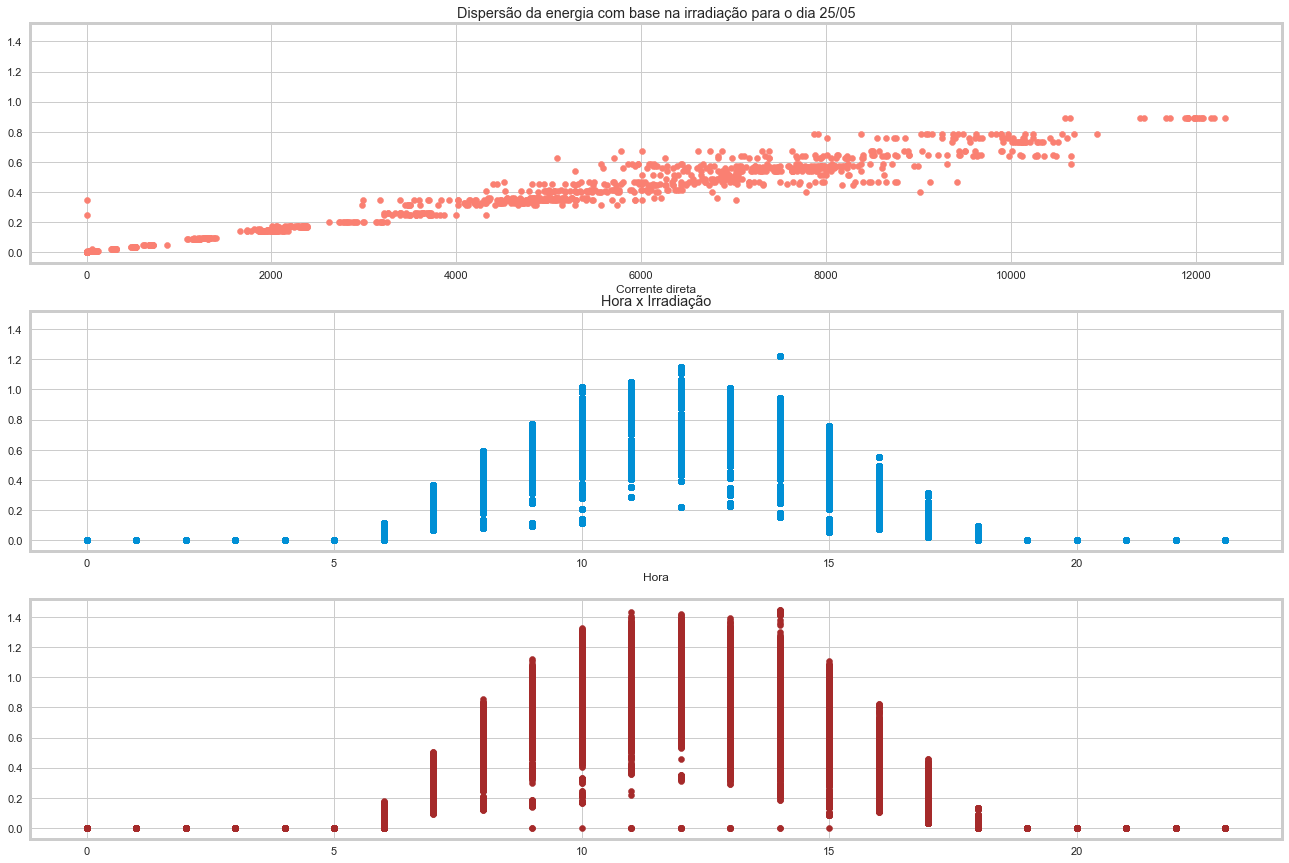

In [485]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(20,15), sharey=True)
ax1.scatter(df1.DC_POWER[df1.DATE_STR == '2020-05-15'], 
            df1.IRRADIATION[df1.DATE_STR == '2020-05-15'], color='salmon')
ax1.set(title='Dispersão da energia com base na irradiação para o dia 25/05', xlabel='Corrente direta')
ax2.scatter(df1.HORAS, 
            df1.IRRADIATION);
ax3.scatter(df1.HORAS,
            df1.DC_POWER/10000, color='brown')
ax2.set(title='Hora x Irradiação', xlabel='Hora');

> É possível observar grande similaridade entre o gráfico de irradiação x hora, com o gráfico de corrente direta x hora.
> Outro ponto observado durante a plotagem é que podemos transformar a escala de corrente direta (ou alternada) para mesma escala da irradiação dividindo por 10000. kW/mˆ2 

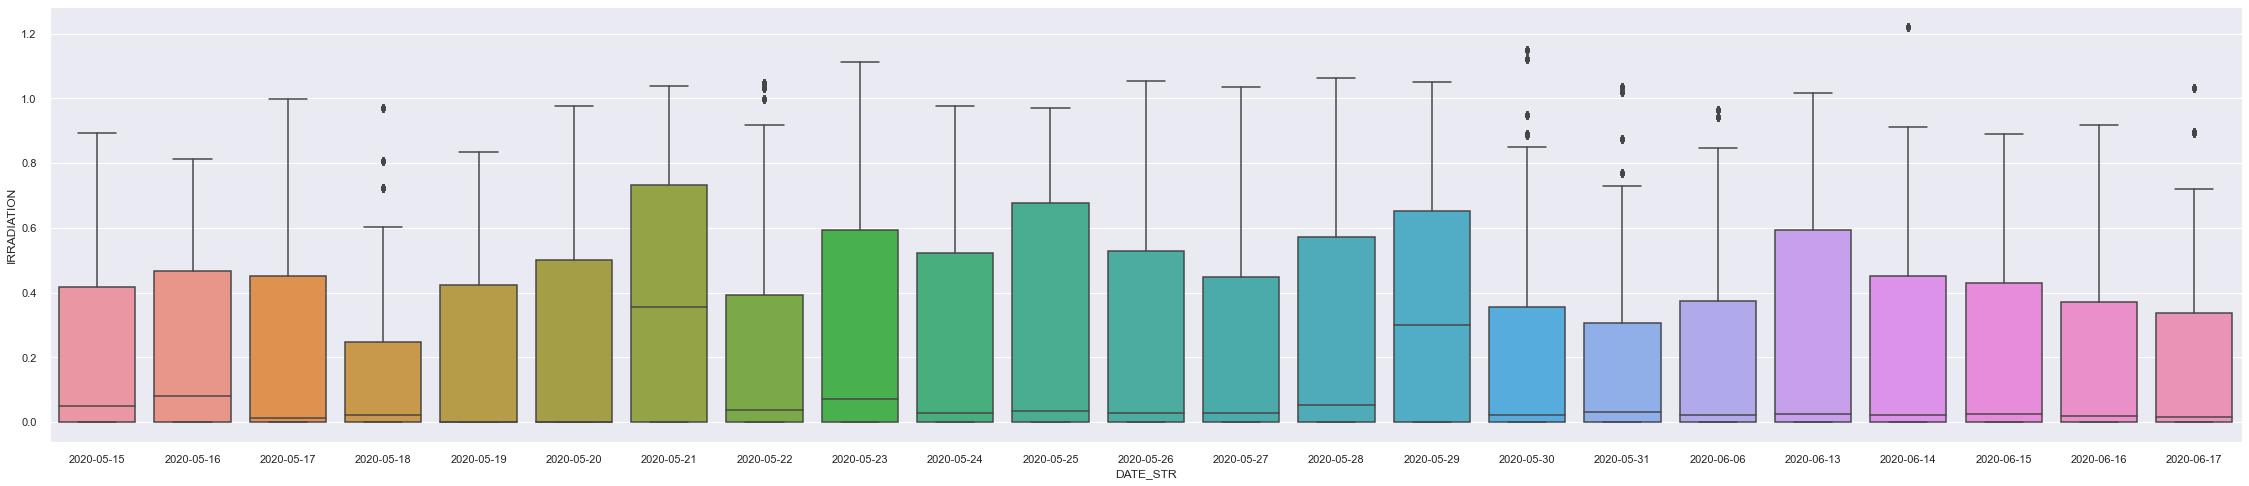

In [534]:
sns.boxplot('DATE_STR', 'IRRADIATION', data=df1)
sns.set(rc = {'figure.figsize':(35,8)})

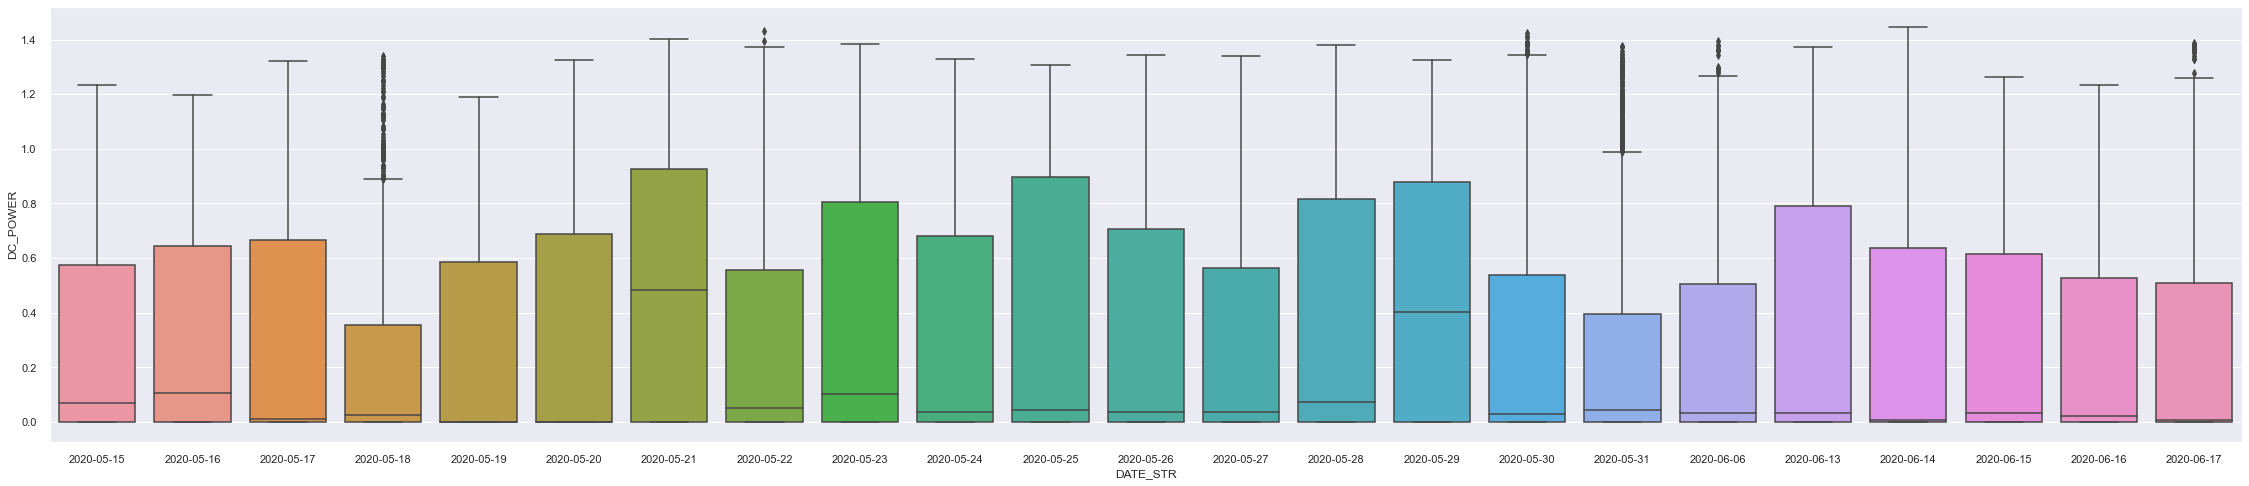

In [487]:
sns.boxplot('DATE_STR', df1.DC_POWER/10000, data=df1)
sns.set(rc = {'figure.figsize':(35,8)})

- Novamente, grande similaridade, inclusive nos outliers de corrente direta e irradiação, sendo mais uma forte relação entre essas duas features. O que comprova a seguinte explicação:
    * A incidência direta da radiação solar é muito importante para que as células fotovoltaicas apresentem a melhor eficiência na conversão da radiação solar em energia elétrica, pois, quanto mais luz direta o painel solar recebe, mais energia elétrica será gerada. Fonte: https://www.cwbenergy.com.br/

In [488]:
df1.to_csv('./data/output.csv')

### Criando um modelo de Machine Learning
* Com base nos estudos das variáveis, foi possível enxergar similaridades entre algumas features com a temperatura do módulo, que é registrada por um sensor.
* O objetivo do modelo que será criado é prever a temperatura do módulo, assim, poderia ser removido o sensor de temperatura do módulo e cortar gastos no preço final de um sistema fotovoltaico para o consumidor.

De acordo com [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), entendi que o modelos [RandomForestRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn-ensemble-randomforestregressor) e [LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) podem ser boas escolhas.

In [489]:
# importando modelos que serão testados
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# métricas
from sklearn.metrics import mean_squared_log_error, mean_absolute_error


In [490]:
df_model = df1.copy()

In [491]:
# printando colunas não numéricas
for label, content in df_model.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

DATE_TIME
SOURCE_KEY
DATA
TEMPO
DATE_STR


In [492]:
df_model.drop(['DATE_TIME','DATA', 'TEMPO'], axis=1, inplace=True)

In [493]:
df_model.head()

SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0  1BY6WEcLGh8j5v7       0.0       0.0          0.0    6259559.0   
1  adLQvlD726eNBSB       0.0       0.0          0.0    6271355.0   
2  1IF53ai7Xc0U56Y       0.0       0.0          0.0    6183645.0   
3  3PZuoBAID5Wc2HD       0.0       0.0          0.0    6987759.0   
4  7JYdWkrLSPkdwr4       0.0       0.0          0.0    7602960.0   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  HORAS  MINUTOS  \
0            25.184316           22.857507          0.0      0        0   
1            25.184316           22.857507          0.0      0        0   
2            25.184316           22.857507          0.0      0        0   
3            25.184316           22.857507          0.0      0        0   
4            25.184316           22.857507          0.0      0        0   

     DATE_STR  
0  2020-05-15  
1  2020-05-15  
2  2020-05-15  
3  2020-05-15  
4  2020-05-15

> Com base nos estudos feitos anteriormente, vimos que na análise o TOTAL_YIELD não irá agregar na análise, será removido. Assim como a data, já que o que irá importar para o modelo não é a data em si, e si as condições do dia. A data seria de extrema importancia caso tivessemos features contendo a estação do ano por exemplo. A sourcekey também não será importante, devido que não temos as condições de instalação, como metragem, posição ao sol, etc

In [494]:
df_model.drop(['TOTAL_YIELD', 'DATE_STR', 'SOURCE_KEY'], axis=1, inplace=True)

In [495]:
df_model.head()

DC_POWER  AC_POWER  DAILY_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0       0.0       0.0          0.0            25.184316           22.857507   
1       0.0       0.0          0.0            25.184316           22.857507   
2       0.0       0.0          0.0            25.184316           22.857507   
3       0.0       0.0          0.0            25.184316           22.857507   
4       0.0       0.0          0.0            25.184316           22.857507   

   IRRADIATION  HORAS  MINUTOS  
0          0.0      0        0  
1          0.0      0        0  
2          0.0      0        0  
3          0.0      0        0  
4          0.0      0        0

In [496]:
df_model.dtypes

DC_POWER               float64
AC_POWER               float64
DAILY_YIELD            float64
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
HORAS                    int64
MINUTOS                  int64
dtype: object

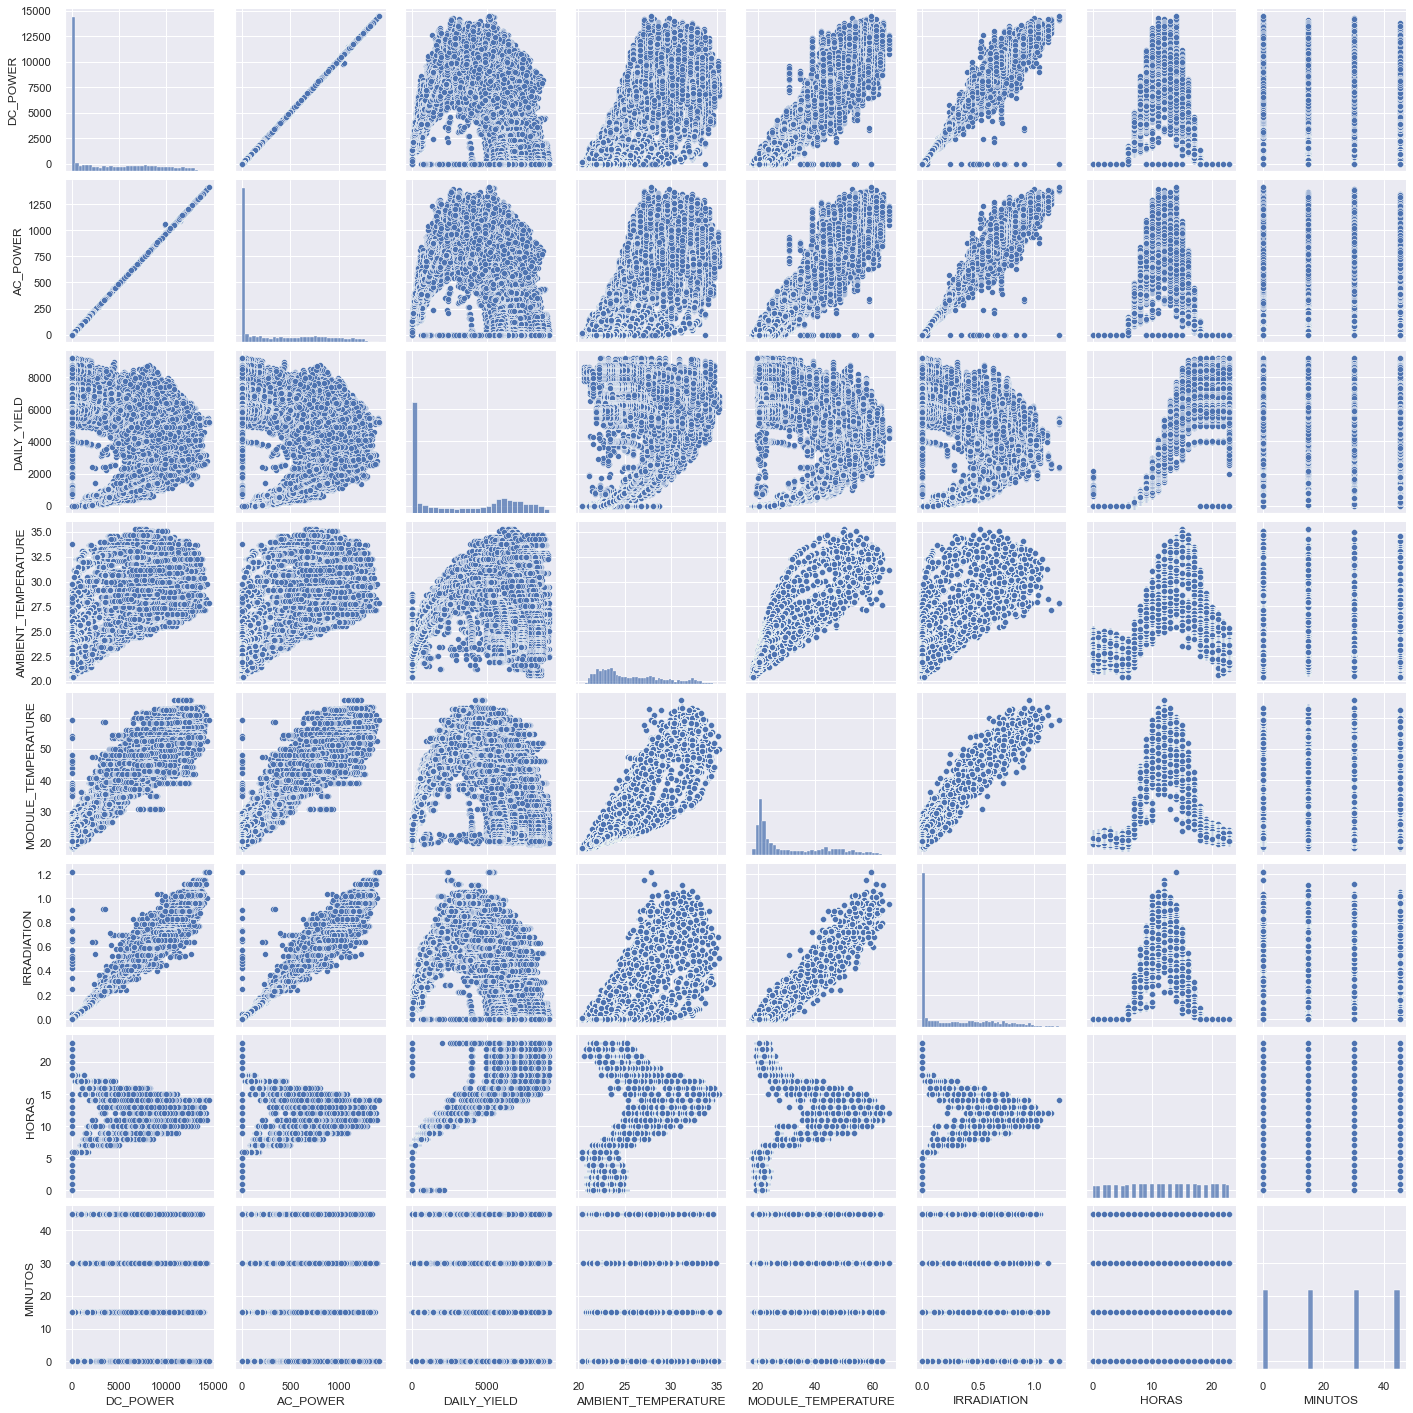

In [497]:
sns.pairplot(df_model);

In [498]:
# Salvando df processado
df_model.to_csv("./data/train_model.csv",
              index=False)

In [499]:
X = df_model.drop('MODULE_TEMPERATURE', axis=1)
y = df_model.MODULE_TEMPERATURE

In [500]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [501]:
# instanciando modelos
reg = LinearRegression()
rf = RandomForestRegressor(n_jobs=-1)

### Boruta para calcular a importancia das features

In [502]:
# criando colunas shadow
np.random.seed(42)
X_shadow = X.apply(np.random.permutation)
X_shadow.columns = ['shadow_' + feat for feat in X.columns]
X_shadow

shadow_DC_POWER  shadow_AC_POWER  shadow_DAILY_YIELD  \
0          1197.428571         0.000000         7876.000000   
1             0.000000         0.000000         6740.000000   
2          8874.857143         0.000000         8494.857143   
3          5077.285714         0.000000         6663.750000   
4             0.000000         0.000000         6916.000000   
...                ...              ...                 ...   
45675     12316.000000         0.000000            0.000000   
45676      6911.750000       642.275000         3829.625000   
45677      8542.714286       815.342857            0.000000   
45678      8481.142857         0.000000            0.857143   
45679      7756.250000       388.485714         8869.000000   

       shadow_AMBIENT_TEMPERATURE  shadow_IRRADIATION  shadow_HORAS  \
0                       21.258344            0.152250             2   
1                       25.417074            0.304071            22   
2                       23.489280            0.552147            12   
3                       27.426601            0.000000            13   
4                       22.000268            0.227681             7   
...                           ...                 ...           ...   
45675                   32.301986            0.000000            22   
45676                   21.588898            0.754912            21   
45677                   21.370376            0.383340             5   
45678                   23.297209            0.968809            10   
45679                   22.941426            0.386081             4   

       shadow_MINUTOS  
0                  15  
1                  45  
2                  45  
3                  30  
4                  45  
...               ...  
45675              30  
45676              15  
45677               0  
45678              15  
45679              15  

[45680 rows x 7 columns]

In [503]:
X_boruta = pd.concat([X,X_shadow], axis = 1)
X_boruta

DC_POWER  AC_POWER  DAILY_YIELD  AMBIENT_TEMPERATURE  IRRADIATION  \
0           0.0       0.0        0.000            25.184316          0.0   
1           0.0       0.0        0.000            25.184316          0.0   
2           0.0       0.0        0.000            25.184316          0.0   
3           0.0       0.0        0.000            25.184316          0.0   
4           0.0       0.0        0.000            25.184316          0.0   
...         ...       ...          ...                  ...          ...   
45675       0.0       0.0     5147.625            21.909288          0.0   
45676       0.0       0.0     5819.000            21.909288          0.0   
45677       0.0       0.0     5910.000            21.909288          0.0   
45678       0.0       0.0     5871.000            21.909288          0.0   
45679       0.0       0.0     5817.000            21.909288          0.0   

       HORAS  MINUTOS  shadow_DC_POWER  shadow_AC_POWER  shadow_DAILY_YIELD  \
0          0        0      1197.428571         0.000000         7876.000000   
1          0        0         0.000000         0.000000         6740.000000   
2          0        0      8874.857143         0.000000         8494.857143   
3          0        0      5077.285714         0.000000         6663.750000   
4          0        0         0.000000         0.000000         6916.000000   
...      ...      ...              ...              ...                 ...   
45675     23       45     12316.000000         0.000000            0.000000   
45676     23       45      6911.750000       642.275000         3829.625000   
45677     23       45      8542.714286       815.342857            0.000000   
45678     23       45      8481.142857         0.000000            0.857143   
45679     23       45      7756.250000       388.485714         8869.000000   

       shadow_AMBIENT_TEMPERATURE  shadow_IRRADIATION  shadow_HORAS  \
0                       21.258344            0.152250             2   
1                       25.417074            0.304071            22   
2                       23.489280            0.552147            12   
3                       27.426601            0.000000            13   
4                       22.000268            0.227681             7   
...                           ...                 ...           ...   
45675                   32.301986            0.000000            22   
45676                   21.588898            0.754912            21   
45677                   21.370376            0.383340             5   
45678                   23.297209            0.968809            10   
45679                   22.941426            0.386081             4   

       shadow_MINUTOS  
0                  15  
1                  45  
2                  45  
3                  30  
4                  45  
...               ...  
45675              30  
45676              15  
45677               0  
45678              15  
45679              15  

[45680 rows x 14 columns]

In [504]:
rf.fit(X_boruta, y)

RandomForestRegressor(n_jobs=-1)

In [505]:
importance = rf.feature_importances_
importance_df = pd.DataFrame({'feature': X_boruta.columns,'vim': importance})

# imprimindo o score de cada feature
for index,row in importance_df.iterrows():
    print(row['feature'], ', Score: ', round(row['vim'],3))


DC_POWER , Score:  0.012
AC_POWER , Score:  0.004
DAILY_YIELD , Score:  0.005
AMBIENT_TEMPERATURE , Score:  0.067
IRRADIATION , Score:  0.907
HORAS , Score:  0.003
MINUTOS , Score:  0.001
shadow_DC_POWER , Score:  0.0
shadow_AC_POWER , Score:  0.0
shadow_DAILY_YIELD , Score:  0.0
shadow_AMBIENT_TEMPERATURE , Score:  0.0
shadow_IRRADIATION , Score:  0.0
shadow_HORAS , Score:  0.0
shadow_MINUTOS , Score:  0.0


Vemos que as features mais importantes são a irradiação, temperatura do ambiente, ac, dc e fornecimento diário, sendo as 3 ultimas menos importantes.
    * Prosseguindo com todas as variáveis para avaliar no futuro com o modelo construído e confirmar ou não os calculos do Boruta.

In [506]:
rf.fit(X_train, y_train)
reg.fit(X_train, y_train)

LinearRegression()

In [507]:
# funcao de avaliacao do modelo
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Treino MAE": mean_absolute_error(y_train, train_preds),
              "Teste MAE": mean_absolute_error(y_test, test_preds),
              "Treino RMSLE": rmsle(y_train, train_preds),
              "Teste RMSLE": rmsle(y_test, test_preds),
              "Treino R^2": model.score(X_train, y_train),
              "Teste R^2": model.score(X_test, y_test)}
    return scores

In [508]:
show_scores(rf)

{'Treino MAE': 0.008028084192622336,
 'Teste MAE': 0.02007613167044815,
 'Treino RMSLE': 0.001167514171134244,
 'Teste RMSLE': 0.0030708103006160405,
 'Treino R^2': 0.9999873218444901,
 'Teste R^2': 0.9999093873014553}

In [509]:
show_scores(reg)

{'Treino MAE': 1.2381648686193578,
 'Teste MAE': 1.2434656003885454,
 'Treino RMSLE': 0.04712992995612444,
 'Teste RMSLE': 0.04691292971295744,
 'Treino R^2': 0.9779697438517411,
 'Teste R^2': 0.9780723815082982}

In [535]:
# funcao de calculo da importancia das features
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

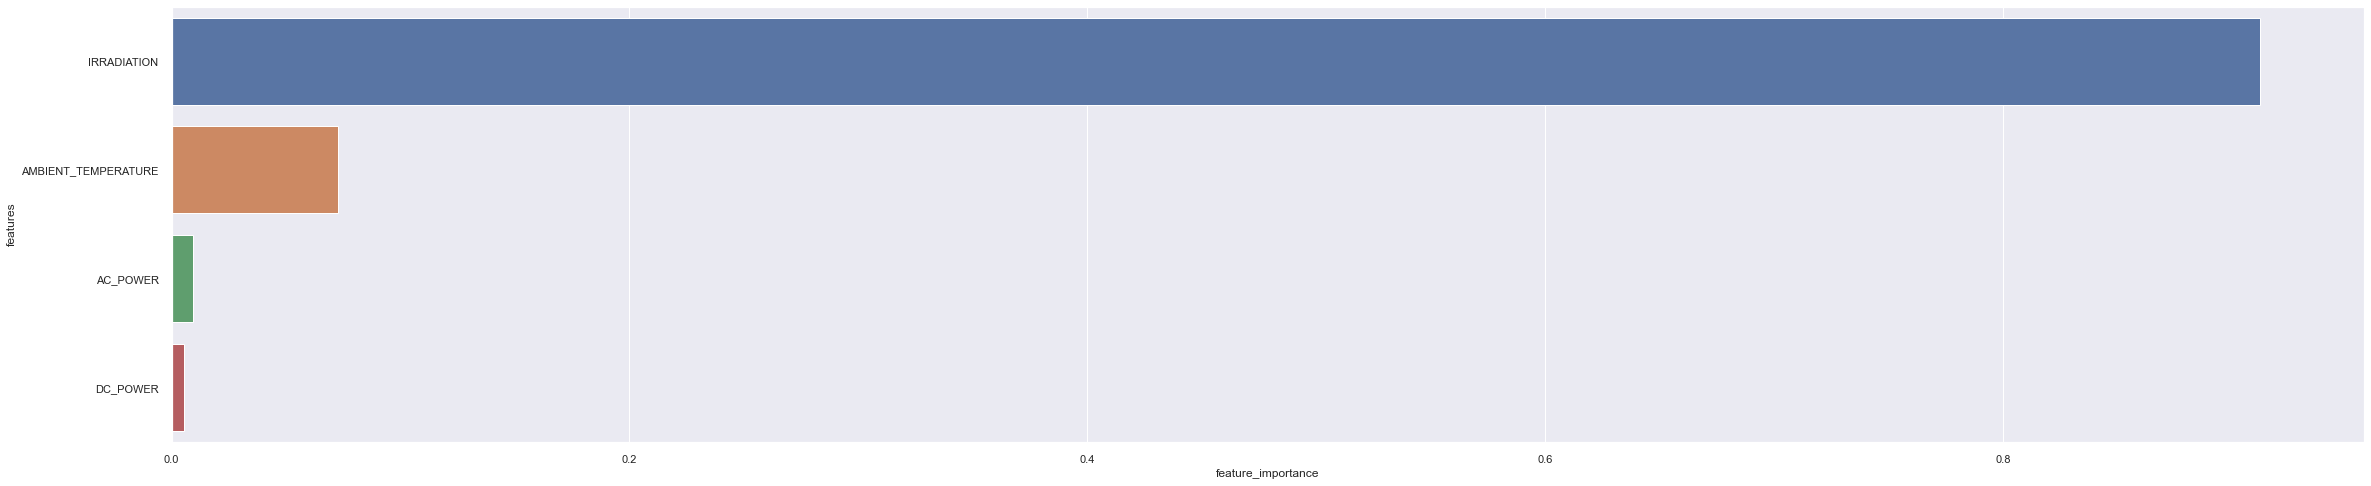

In [536]:
plot_features(X_train.columns, rf.feature_importances_)

In [512]:
reg.coef_

array([-2.08194127e-02,  2.14939178e-01, -6.49314911e-05,  1.23455774e+00,
        2.71866040e+01, -2.27148001e-03, -1.67200105e-03])

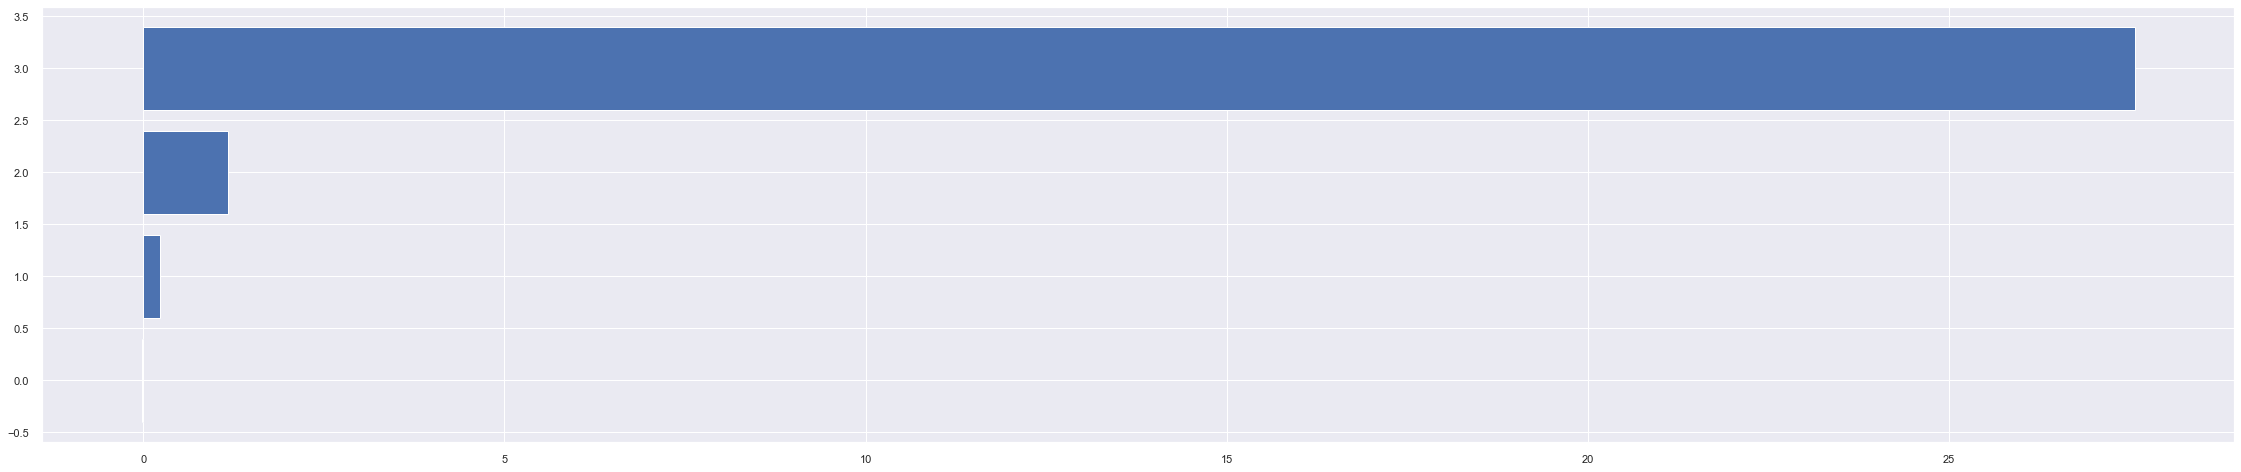

In [537]:
importance=reg.coef_
importance=np.sort(importance)
plt.barh([i for i in range (len(importance))],importance)
plt.show()

O gráfico de importancia das variváveis demonstra o que foi visto nos plots das features ao inicio da construção do modelo. Realmente, não é visto uma relação LINEAR, da temperatura do módulo com as horas, minutos e fornecimento diário. Serão removidos e observados os resultados. Isso também confirma o que o Boruta já havia reportado.

In [514]:
X = df_model.drop(['MODULE_TEMPERATURE', 'HORAS', 'MINUTOS', 'DAILY_YIELD'], axis=1)
y = df_model.MODULE_TEMPERATURE

In [515]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rf.fit(X_train, y_train)
show_scores(rf)

{'Treino MAE': 0.005345814079131536,
 'Teste MAE': 0.012919599059209997,
 'Treino RMSLE': 0.0012234628273372135,
 'Teste RMSLE': 0.0024969323485096806,
 'Treino R^2': 0.9999879064735367,
 'Teste R^2': 0.9999425215960139}

In [516]:
reg.fit(X_train, y_train)
show_scores(reg)

{'Treino MAE': 1.2356549149059242,
 'Teste MAE': 1.2405477145554427,
 'Treino RMSLE': 0.046897415272910255,
 'Teste RMSLE': 0.046635774801418776,
 'Treino R^2': 0.9777819345571303,
 'Teste R^2': 0.9779571521965477}

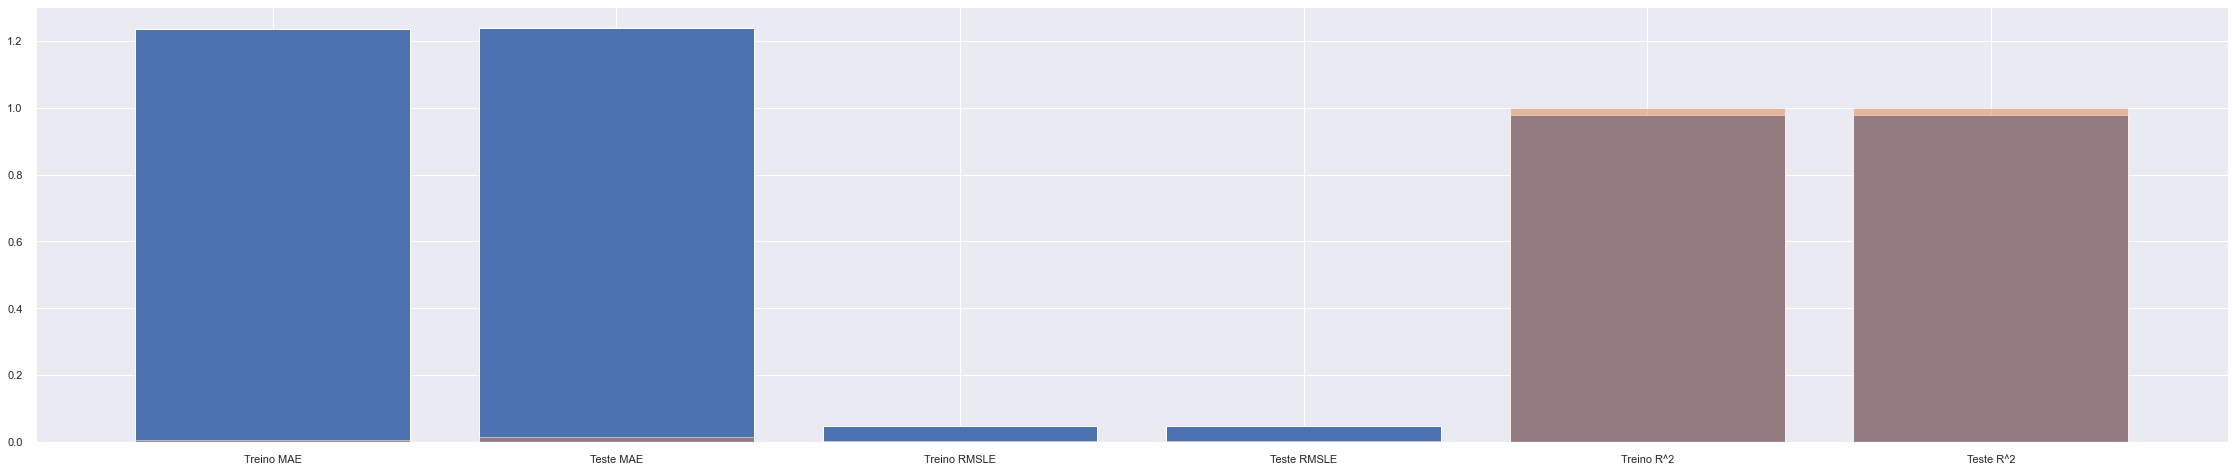

In [538]:
plt.bar(range(len(show_scores(reg))), list(show_scores(reg).values()), align='center')
plt.bar(range(len(show_scores(rf))), list(show_scores(rf).values()), align='center', alpha=0.5)
plt.xticks(range(len(show_scores(reg))), list(show_scores(reg).keys()));

In [518]:
show_scores(rf).items()


dict_items([('Treino MAE', 0.005345814079131539), ('Teste MAE', 0.012919599059209997), ('Treino RMSLE', 0.0012234628273372133), ('Teste RMSLE', 0.002496932348509681), ('Treino R^2', 0.9999879064735367), ('Teste R^2', 0.9999425215960139)])

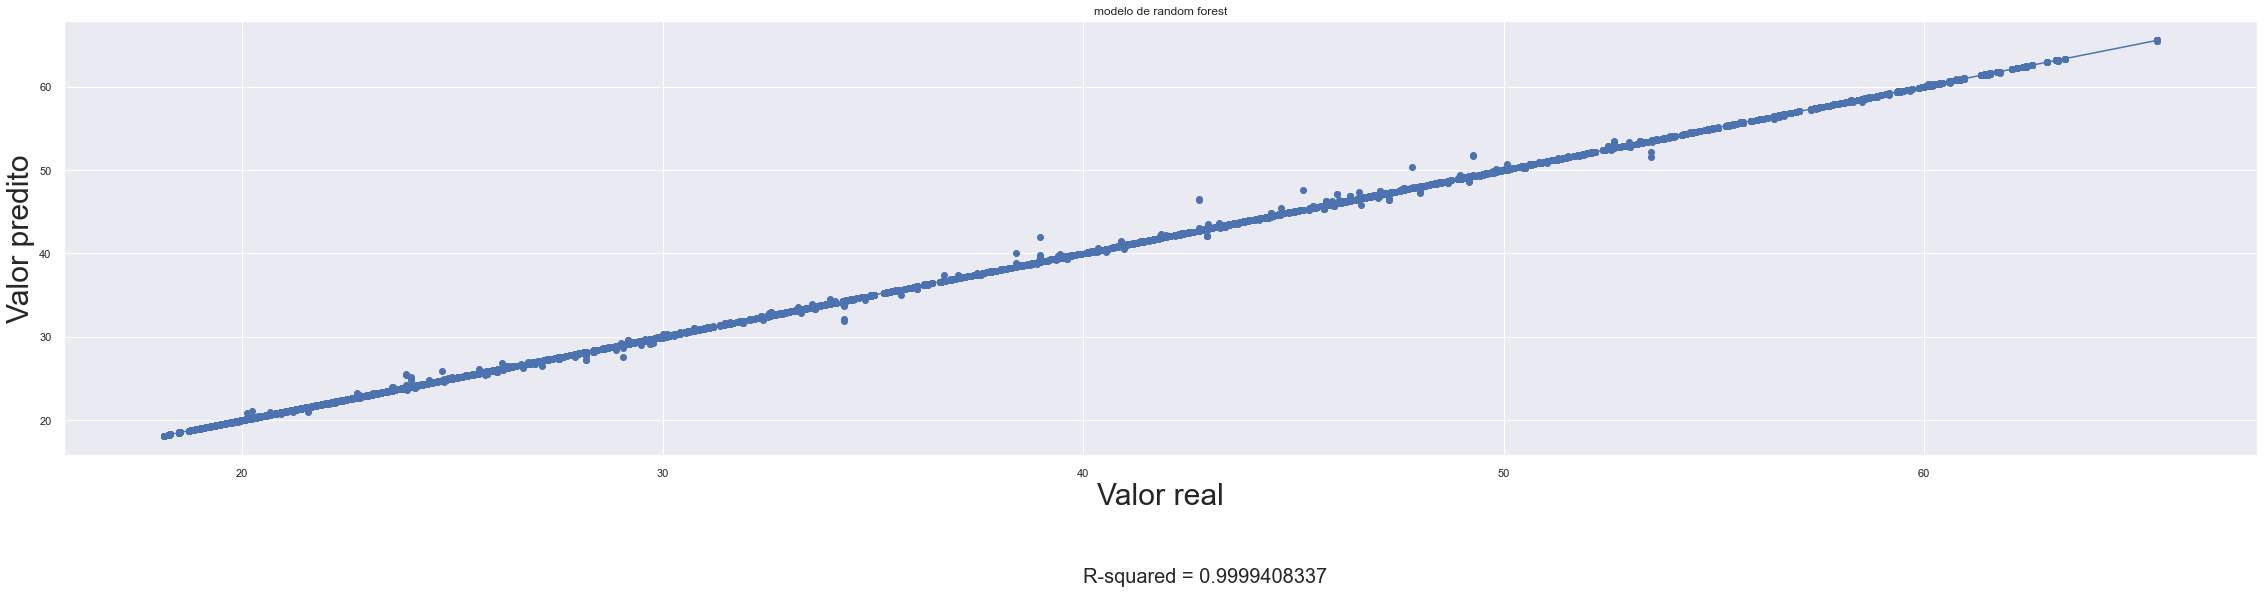

In [547]:
r_squared_rf = 0.999940833692857
plt.scatter(y_test, rf.predict(X_test))
plt.title('modelo de random forest')
plt.xlabel('Valor real', fontsize=30)
plt.ylabel('Valor predito', fontsize=30)

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, rf.predict(X_test), 1))(np.unique(y_test)))

plt.text(40, 0.5, 'R-squared = %0.10f' % r_squared_rf, fontsize=20)
plt.show()

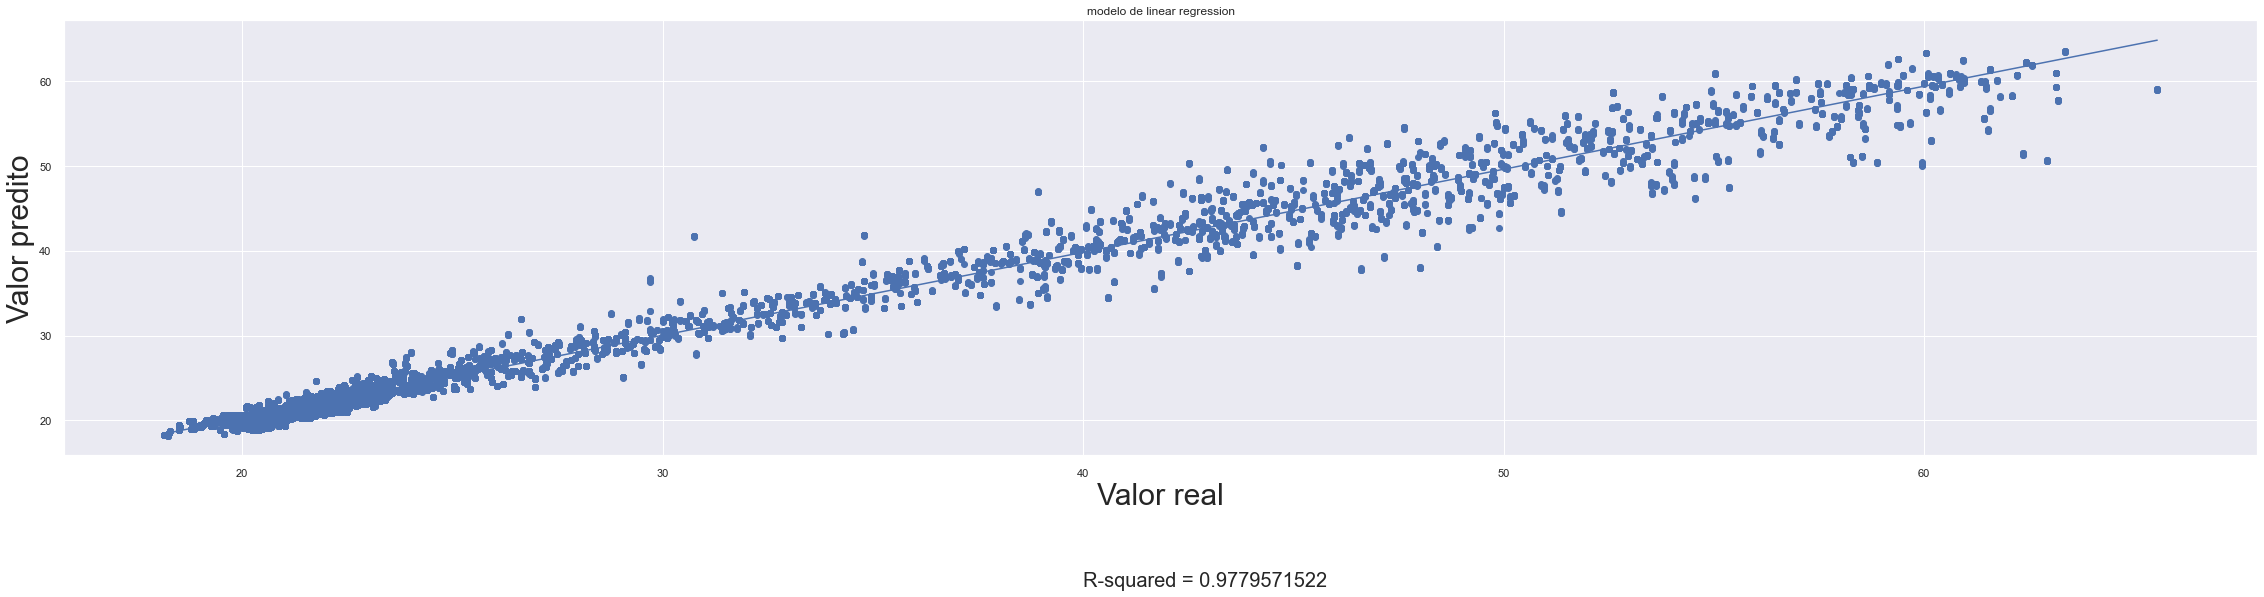

In [548]:
r_squared_rf = 0.9779571521965477
plt.scatter(y_test, reg.predict(X_test))
plt.title('modelo de linear regression')
plt.xlabel('Valor real', fontsize=30)
plt.ylabel('Valor predito', fontsize=30)

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, reg.predict(X_test), 1))(np.unique(y_test)))

plt.text(40, 0.5, 'R-squared = %0.10f' % r_squared_rf, fontsize=20)
plt.show()

> Reduzido ainda mais o erro com a extração das features desnecessárias.

In [521]:
from sklearn.model_selection import cross_val_score

In [522]:
print(f"Cross-validation score do RandomForest Rˆ2 : {np.mean(cross_val_score(rf, X, y, cv=5, scoring='r2')) * 100}%")
print(f"Cross-validation score do LinearRegression Rˆ2 : {np.mean(cross_val_score(reg, X, y, cv=5, scoring='r2')) * 100}%")

Cross-validation score do RandomForest Rˆ2 : 96.36968804878438%
Cross-validation score do LinearRegression Rˆ2 : 97.47236279641724%


Quando particionamos o dataset através do CrossValidation em 5 sets, observamos que na verdade o modelo de regressão apresenta resultados um pouco melhores.

In [523]:
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    rf_cv = RandomForestRegressor(n_estimators=i).fit(X_train, y_train)
    print(f"Model accruacy on test set: {rf_cv.score(X_test, y_test)}")
    print(f"Cross-validation score: {np.mean(cross_val_score(rf_cv, X, y, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accruacy on test set: 0.999900456628998
Cross-validation score: 96.26679110071876%

Trying model with 20 estimators...
Model accruacy on test set: 0.999944948465491
Cross-validation score: 96.34055978539791%

Trying model with 30 estimators...
Model accruacy on test set: 0.9999458416743823
Cross-validation score: 96.35005310624022%

Trying model with 40 estimators...
Model accruacy on test set: 0.999941018682627
Cross-validation score: 96.40000665242523%

Trying model with 50 estimators...
Model accruacy on test set: 0.9999420499125484
Cross-validation score: 96.39059565358892%

Trying model with 60 estimators...
Model accruacy on test set: 0.9999394690768809
Cross-validation score: 96.3618760515437%

Trying model with 70 estimators...
Model accruacy on test set: 0.9999308544064809
Cross-validation score: 96.35234526865291%

Trying model with 80 estimators...
Model accruacy on test set: 0.9999488811558164
Cross-validation score: 96.4237111839032

### Hyper'tunando' os modelos
* Se possível, através do randomizedsearchCV

In [524]:
from sklearn.model_selection import RandomizedSearchCV

# criando um dicionário com varios parametros do randomforest para serem randomizados
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [525]:
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 10}

In [526]:
show_scores(rs_model)

{'Treino MAE': 0.5186236291864793,
 'Teste MAE': 0.5399789974800504,
 'Treino RMSLE': 0.021097979965145203,
 'Teste RMSLE': 0.02176149382298706,
 'Treino R^2': 0.9965361821709815,
 'Teste R^2': 0.9962175650596776}

Vou utilizar n estimators como 80, como foi encontrado no loop anterior que atingiu maior rˆ2 score.

In [527]:
modelo_ideal_rf = RandomForestRegressor(n_estimators= 80,
                                    min_samples_split = 14,
                                    min_samples_leaf = 13,
                                    max_samples = 10000,
                                    max_features = 'sqrt',
                                    max_depth = None)
modelo_ideal_rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', max_samples=10000,
                      min_samples_leaf=13, min_samples_split=14,
                      n_estimators=80)

In [528]:
show_scores(modelo_ideal_rf)

{'Treino MAE': 0.7834240048230129,
 'Teste MAE': 0.825590492558662,
 'Treino RMSLE': 0.030304087460716746,
 'Teste RMSLE': 0.03151369934268746,
 'Treino R^2': 0.990395411680065,
 'Teste R^2': 0.989367050952973}

In [529]:
print(f"Cross-validation score do RandomForest Rˆ2 : {np.mean(cross_val_score(modelo_ideal_rf, X, y, cv=5, scoring='r2')) * 100}%")
print(f"Cross-validation score do LinearRegression Rˆ2 : {np.mean(cross_val_score(reg, X, y, cv=5, scoring='r2')) * 100}%")

Cross-validation score do RandomForest Rˆ2 : 97.28620578644124%
Cross-validation score do LinearRegression Rˆ2 : 97.47236279641724%


> Tivemos um aumento do Rˆ2 score no cross val test, o que é bom.

## Conclusão:
* Ao decorrer do notebook foi possível compreender a importancia de cada variável para um sistema fotovoltaico e foi construído um modelo com o objetivo de subtituir o sensor de temperatura do módulo.
* É possível ainda fazer um estudo comparativo entre a planta 1 e 2, presentes na pasta data.
* Ambos os modelos de ML atingiram resultados incríveis,o modelo de regressão linear é o mais simples e leve.

In [530]:
import pickle

pickle.dump(modelo_ideal_rf, open("./models/random_forest_model_1.pkl", "wb"))
pickle.dump(reg, open("./models/linear_regression_model_2.pkl", "wb"))